In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
cities = pd.read_csv(r"C:\Users\babum\Downloads\Telegram Desktop\C6 Input Files\C6 Input Files\Dataset\dim_cities.csv")
respondents = pd.read_csv(r"C:\Users\babum\Downloads\Telegram Desktop\C6 Input Files\C6 Input Files\Dataset\dim_repondents.csv")
survey_responses = pd.read_csv(r"C:\Users\babum\Downloads\Telegram Desktop\C6 Input Files\C6 Input Files\Dataset\fact_survey_responses.csv")


# Display the first few rows of each dataframe
(cities.head(), respondents.head(), survey_responses.head())

(  City_ID       City    Tier
 0   CT111      Delhi  Tier 1
 1   CT112     Mumbai  Tier 1
 2   CT113  Bangalore  Tier 1
 3   CT114    Chennai  Tier 1
 4   CT115    Kolkata  Tier 2,
    Respondent_ID            Name    Age  Gender City_ID
 0         120031  Aniruddh Issac  15-18  Female   CT117
 1         120032     Trisha Rout  19-30    Male   CT118
 2         120033    Yuvraj  Virk  15-18    Male   CT116
 3         120034    Pranay Chand  31-45  Female   CT113
 4         120035  Mohanlal Joshi  19-30  Female   CT120,
    Response_ID  Respondent_ID  Consume_frequency  \
 0       103001         120031   2-3 times a week   
 1       103002         120032  2-3 times a month   
 2       103003         120033             Rarely   
 3       103004         120034   2-3 times a week   
 4       103005         120035              Daily   
 
                       Consume_time              Consume_reason Heard_before  \
 0  To stay awake during work/study  Increased energy and focus          Yes

In [3]:
# Join the tables on their respective keys
data = (
    survey_responses.merge(respondents, how="left", on="Respondent_ID")
    .merge(cities, how="left", on="City_ID")
)

# Display the first few rows of the merged DataFrame
pd.set_option('display.max_columns', None)
data.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2


In [4]:
data['Improvements_desired'].value_counts()

Reduced sugar content       2995
More natural ingredients    2498
Wider range of flavors      2037
Healthier alternatives      1472
Other                        998
Name: Improvements_desired, dtype: int64

In [5]:
# Check for inconsistent responses
inconsistent_responses = data[(data['Heard_before'] == 'No') & (data['Taste_experience'] != 0)]
inconsistent_responses.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
6,103007,120037,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,Health concerns,Cola-Coka,Brand reputation,Other,Guarana,Yes,No,Online ads,Innovative bottle design,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,CT112,Mumbai,Tier 1
7,103008,120038,Rarely,Before exercise,To combat fatigue,No,Neutral,Healthy,Yes,4,Unfamiliar with the brand,Gangster,Brand reputation,Reduced sugar content,Sugar,Yes,Not Sure,Online ads,Compact and portable cans,Yes,50-99,Gyms and fitness centers,Social outings/parties,Rhea Khanna,19-30,Male,CT116,Hyderabad,Tier 1


In [6]:
# Count the number of inconsistent responses
num_inconsistent_responses = inconsistent_responses.shape[0]

# Calculate the percentage of inconsistent responses
percentage_inconsistent = (num_inconsistent_responses / data.shape[0]) * 100

num_inconsistent_responses, percentage_inconsistent

(5553, 55.53)

In [61]:
# Count the number of responses by gender
gender_preference = data['Gender'].value_counts()

# Display the result
gender_preference


Male          6038
Female        3455
Non-binary     507
Name: Gender, dtype: int64

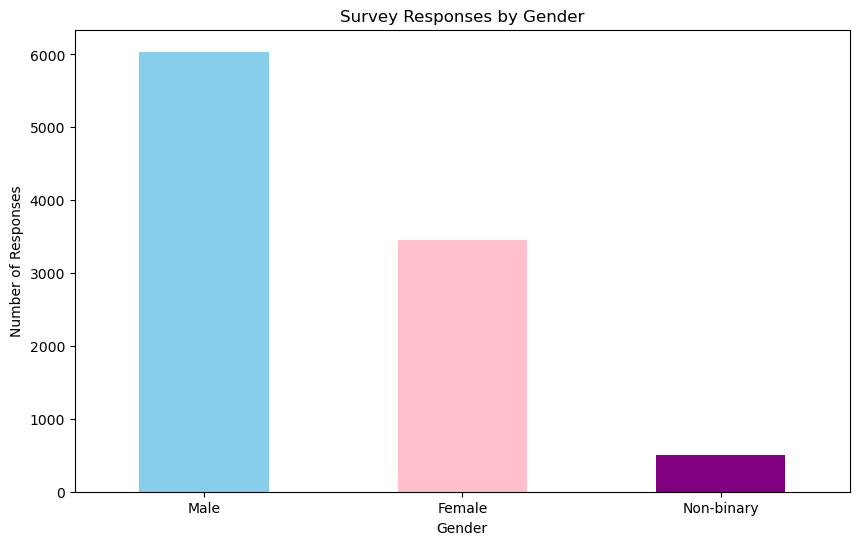

In [62]:
# Create a bar plot for gender preference
plt.figure(figsize=(10, 6))
gender_preference.plot(kind='bar', color=['skyblue', 'pink', 'purple'])
plt.title('Survey Responses by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.show()


In [63]:
# Count the number of responses by age
age_preference = data['Age'].value_counts()

# Display the result
age_preference


19-30    5520
31-45    2376
15-18    1488
46-65     426
65+       190
Name: Age, dtype: int64

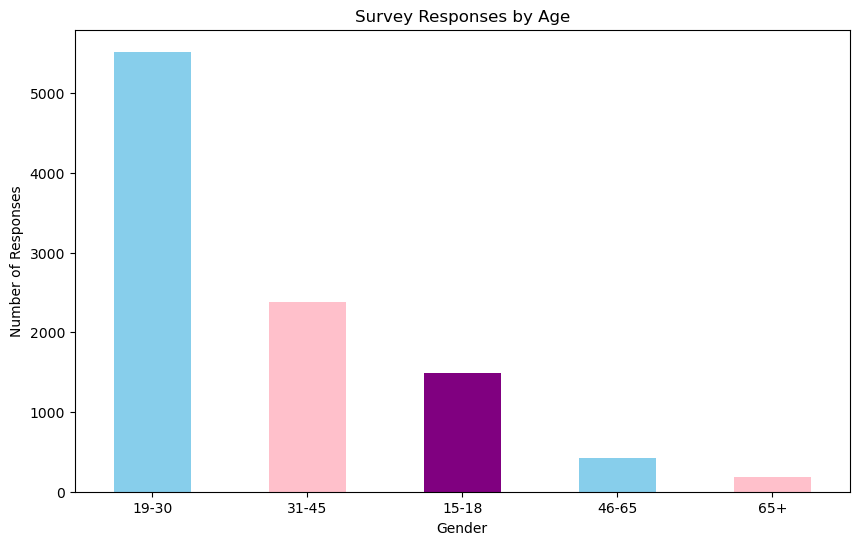

In [64]:
# Create a bar plot for gender preference
plt.figure(figsize=(10, 6))
age_preference.plot(kind='bar', color=['skyblue', 'pink', 'purple'])
plt.title('Survey Responses by Age')
plt.xlabel('Gender')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.show()

In [65]:
# Grouping the data by 'Gender' and 'Age' and calculating the count
gender_age = data.groupby(['Gender', 'Age'])['Response_ID'].count().unstack()

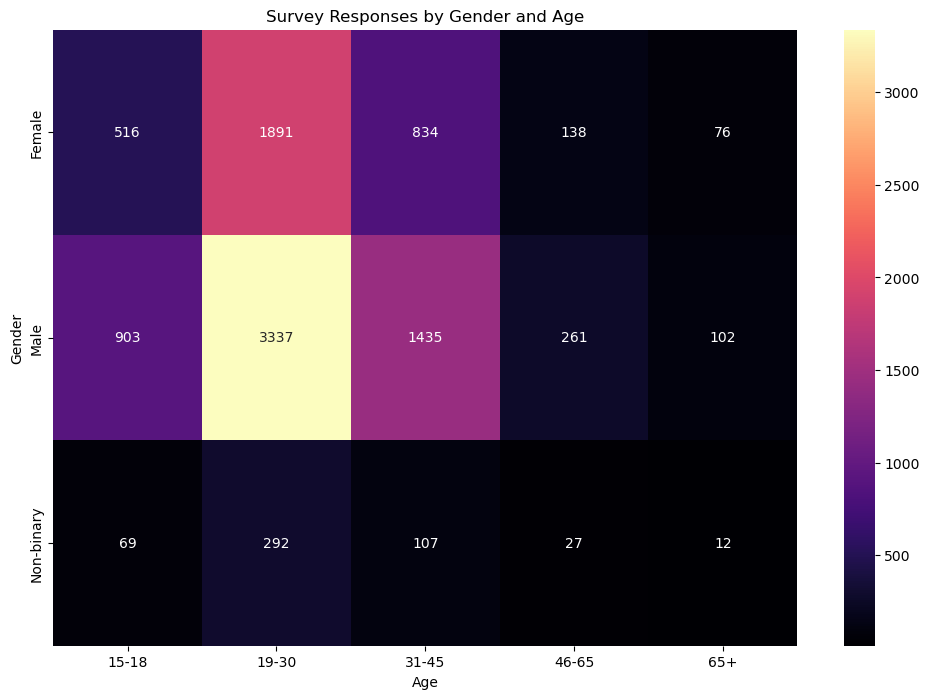

In [67]:
# Plotting the consumption frequency heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(gender_age, annot=True, cmap='magma', fmt='g')
plt.title('Survey Responses by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

In [68]:
# Calculate the percentage of each gender group that prefers energy drinks
consume_frequency = ['Daily', '2-3 times a week']

gender_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby('Gender').size()
gender_total = data['Gender'].value_counts()
gender_preference_percentage = (gender_preference / gender_total) * 100

gender_preference_percentage


Female        48.712012
Male          48.211328
Non-binary    47.928994
dtype: float64

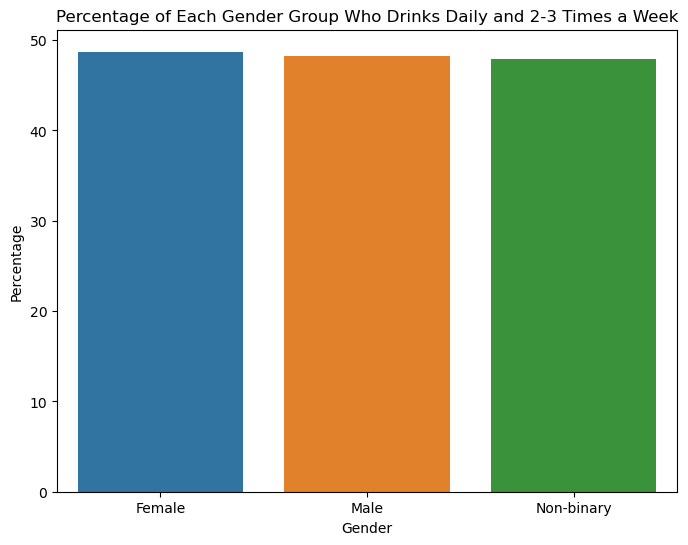

In [69]:
# Plotting the percentage of each gender group
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_preference_percentage.index, y=gender_preference_percentage.values)
plt.title('Percentage of Each Gender Group Who Drinks Daily and 2-3 Times a Week')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


In [70]:
# Calculate the percentage of each gender group that prefers energy drinks
consume_frequency = ['Daily', '2-3 times a week']

age_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby('Age').size()
age_total = data['Age'].value_counts()
Age_drinking_frequency = (age_preference / age_total) * 100

Age_drinking_frequency

15-18    49.395161
19-30    48.061594
31-45    48.695286
46-65    46.244131
65+      50.000000
dtype: float64

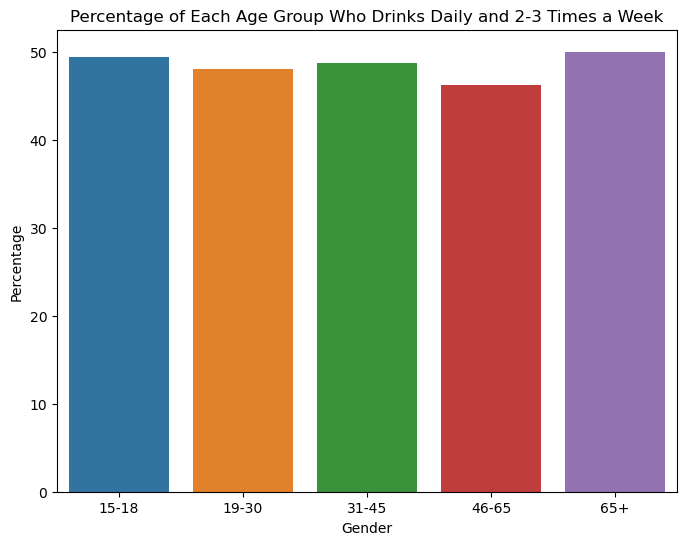

In [71]:
# Plotting the percentage of each gender group
plt.figure(figsize=(8, 6))
sns.barplot(x=Age_drinking_frequency.index, y=Age_drinking_frequency.values)
plt.title('Percentage of Each Age Group Who Drinks Daily and 2-3 Times a Week')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [72]:
age_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby(['Gender','Age']).size()

age_preference

Gender      Age  
Female      15-18     255
            19-30     924
            31-45     404
            46-65      64
            65+        36
Male        15-18     443
            19-30    1590
            31-45     705
            46-65     120
            65+        53
Non-binary  15-18      37
            19-30     139
            31-45      48
            46-65      13
            65+         6
dtype: int64

In [73]:
# Calculate the count of respondents for each combination of gender and age group
gender_age_counts = data.groupby(['Gender', 'Age']).size().reset_index(name='Count')

# Find the combination with the highest count
most_preferred_combination = gender_age_counts[gender_age_counts['Count'] == gender_age_counts['Count']]

most_preferred_combination


,Gender,Age,Count
0,Female,15-18,516
1,Female,19-30,1891
2,Female,31-45,834
3,Female,46-65,138
4,Female,65+,76
5,Male,15-18,903
6,Male,19-30,3337
7,Male,31-45,1435
8,Male,46-65,261
9,Male,65+,102


In [74]:
data["Gender"].value_counts()

Male          6038
Female        3455
Non-binary     507
Name: Gender, dtype: int64

In [75]:
# Calculate the count of respondents for each combination of gender and age group
gender_age_counts = data.groupby(['Gender', 'Age']).size().reset_index(name='Count')

# Find the combination with the highest count
most_preferred_combination = gender_age_counts[gender_age_counts['Count'] == gender_age_counts['Count']]

# Divide the count column by the total number per gender
gender_counts = data['Gender'].value_counts()
most_preferred_combination['Percentage'] = most_preferred_combination.apply(lambda row: row['Count'] / gender_counts[row['Gender']], axis=1)

most_preferred_combination


,Gender,Age,Count,Percentage
0,Female,15-18,516,0.149349
1,Female,19-30,1891,0.547323
2,Female,31-45,834,0.241389
3,Female,46-65,138,0.039942
4,Female,65+,76,0.021997
5,Male,15-18,903,0.149553
6,Male,19-30,3337,0.552666
7,Male,31-45,1435,0.237661
8,Male,46-65,261,0.043226
9,Male,65+,102,0.016893


In [21]:
# Check the preferred ingredients among respondents
preferred_ingredients = data['Ingredients_expected'].value_counts(normalize=True)

preferred_ingredients

Caffeine    0.3896
Vitamins    0.2534
Sugar       0.2017
Guarana     0.1553
Name: Ingredients_expected, dtype: float64

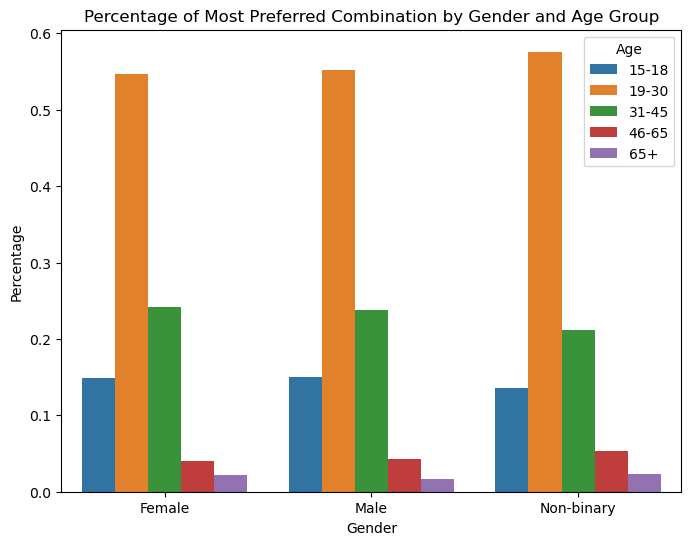

In [76]:
# Plotting the percentage count as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Percentage', hue='Age', data=most_preferred_combination)
plt.title('Percentage of Most Preferred Combination by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [77]:
# Grouping the data by 'Gender' and 'Age' and calculating the consume frequency count
gender_age_consume = data.groupby(['Gender', 'Age'])['Consume_frequency'].value_counts().unstack().fillna(0)

gender_age_consume

Consume_frequency  2-3 times a month  2-3 times a week  Daily  Once a week  \
Gender     Age                                                               
Female     15-18                  74               198     57           78   
           19-30                 301               652    272          311   
           31-45                 144               292    112          125   
           46-65                  19                48     16           33   
           65+                    11                27      9           14   
Male       15-18                 147               312    131          156   
           19-30                 531              1159    431          533   
           31-45                 236               488    217          221   
           46-65                  41                95     25           48   
           65+                    13                40     13           15   
Non-binary 15-18                  11                29      8           10   
           19-30                  59               106     33           44   
           31-45                  18                29     19           15   
           46-65                   6                12      1            5   
           65+                     2                 4      2            1   

Consume_frequency  Rarely  
Gender     Age             
Female     15-18      109  
           19-30      355  
           31-45      161  
           46-65       22  
           65+         15  
Male       15-18      157  
           19-30      683  
           31-45      273  
           46-65       52  
           65+         21  
Non-binary 15-18       11  
           19-30       50  
           31-45       26  
           46-65        3  
           65+          3

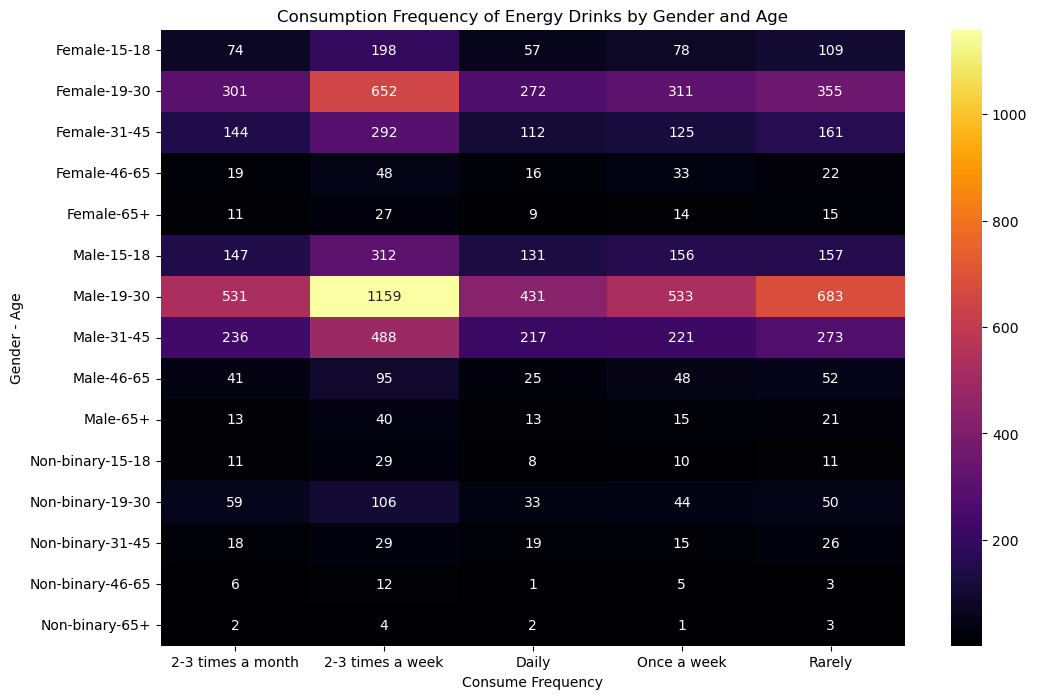

In [79]:
# Plotting the consumption frequency heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(gender_age_consume, annot=True, cmap='inferno', fmt='g')
plt.title('Consumption Frequency of Energy Drinks by Gender and Age')
plt.xlabel('Consume Frequency')
plt.ylabel('Gender - Age')
plt.show()

In [80]:
# Calculate the percentage of each consumption frequency category within each gender and age group combination
gender_age_consume_percentage = gender_age_consume.div(gender_age_consume.sum(axis=1), axis=0) * 100

gender_age_consume_percentage


Consume_frequency  2-3 times a month  2-3 times a week      Daily  \
Gender     Age                                                      
Female     15-18           14.341085         38.372093  11.046512   
           19-30           15.917504         34.479112  14.383924   
           31-45           17.266187         35.011990  13.429257   
           46-65           13.768116         34.782609  11.594203   
           65+             14.473684         35.526316  11.842105   
Male       15-18           16.279070         34.551495  14.507198   
           19-30           15.912496         34.731795  12.915793   
           31-45           16.445993         34.006969  15.121951   
           46-65           15.708812         36.398467   9.578544   
           65+             12.745098         39.215686  12.745098   
Non-binary 15-18           15.942029         42.028986  11.594203   
           19-30           20.205479         36.301370  11.301370   
           31-45           16.822430         27.102804  17.757009   
           46-65           22.222222         44.444444   3.703704   
           65+             16.666667         33.333333  16.666667   

Consume_frequency  Once a week     Rarely  
Gender     Age                             
Female     15-18     15.116279  21.124031  
           19-30     16.446325  18.773136  
           31-45     14.988010  19.304556  
           46-65     23.913043  15.942029  
           65+       18.421053  19.736842  
Male       15-18     17.275748  17.386489  
           19-30     15.972430  20.467486  
           31-45     15.400697  19.024390  
           46-65     18.390805  19.923372  
           65+       14.705882  20.588235  
Non-binary 15-18     14.492754  15.942029  
           19-30     15.068493  17.123288  
           31-45     14.018692  24.299065  
           46-65     18.518519  11.111111  
           65+        8.333333  25.000000

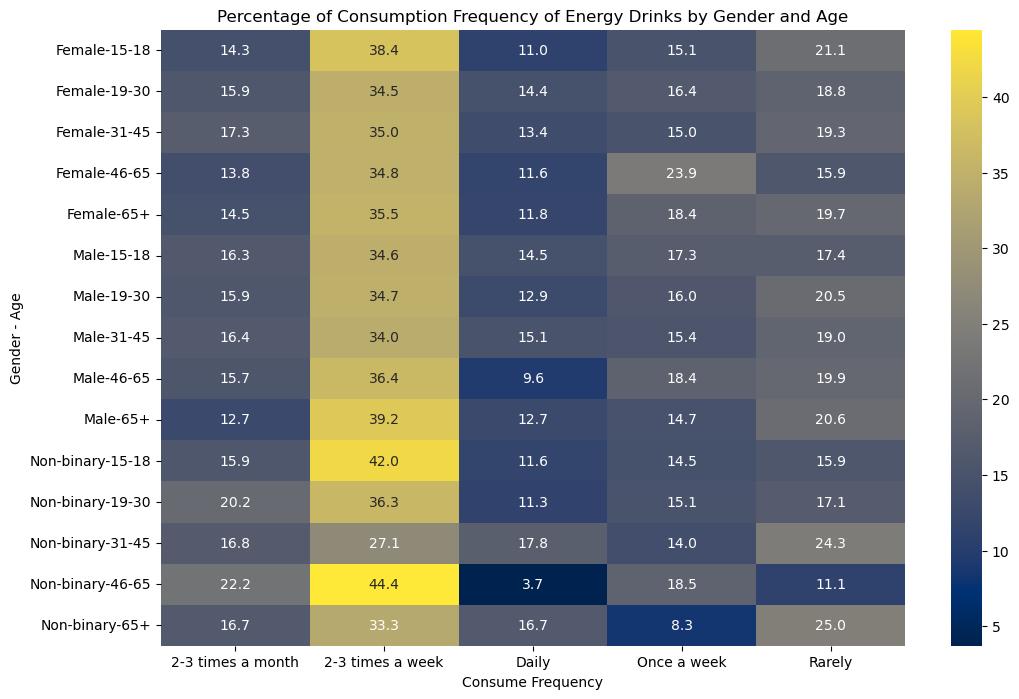

In [82]:
# Plotting the consumption frequency heatmap as a percentage
plt.figure(figsize=(12, 8))
sns.heatmap(gender_age_consume_percentage, annot=True, cmap='cividis', fmt='.1f')
plt.title('Percentage of Consumption Frequency of Energy Drinks by Gender and Age')
plt.xlabel('Consume Frequency')
plt.ylabel('Gender - Age')
plt.show()


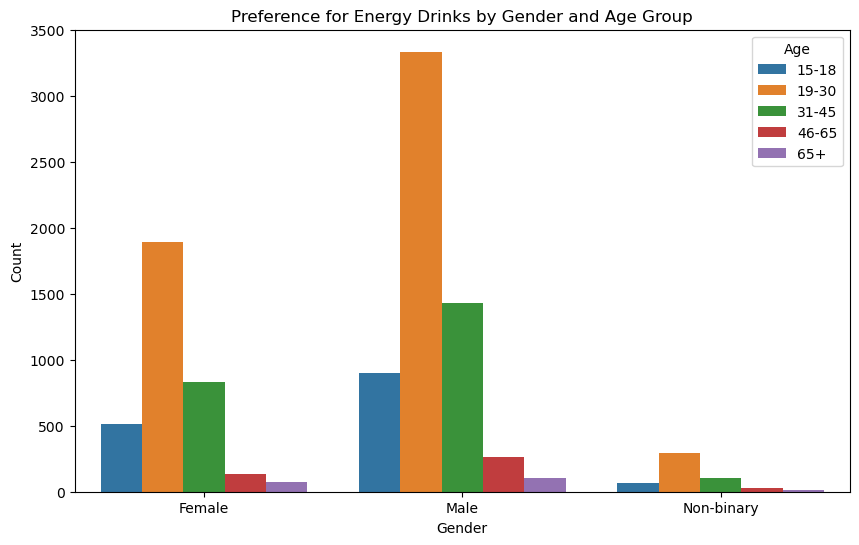

In [83]:
# Plotting the combination of gender and age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Count', hue='Age', data=most_preferred_combination)
plt.title('Preference for Energy Drinks by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [84]:
data['General_perception'].value_counts()

Effective    2909
Not sure     2610
Healthy      2243
Dangerous    2238
Name: General_perception, dtype: int64

In [85]:
# Filter the merged data to include only those where General_perception is either 'Healthy' or 'Effective'
filtered_responses = data[data['General_perception'].isin(['Not sure', 'Dangerous'])]

# Group by gender and count the responses
gender_perception = filtered_responses.groupby('Gender')['General_perception'].value_counts().unstack()

# Add a total column
gender_perception['Total'] = gender_perception.sum(axis=1)

# Display the updated dataframe
gender_perception


General_perception,Dangerous,Not sure,Total
Gender,,,
Female,1016,1025,2041
Male,1133,1433,2566
Non-binary,89,152,241


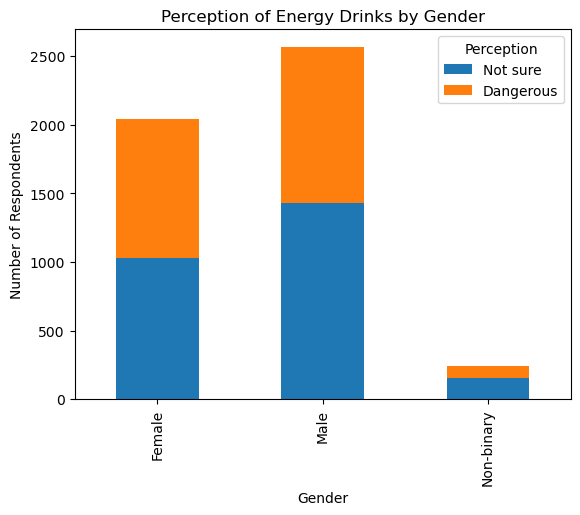

In [86]:
# Plot the perceptions
gender_perception[['Not sure', 'Dangerous']].plot(kind='bar', stacked=True)
plt.title('Perception of Energy Drinks by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.legend(title='Perception')
plt.show()


In [87]:
# Filter the data to include only those where General_perception is either 'Not sure' or 'Dangerous',
# or where Improvements_desired is 'Healthier alternatives' or 'More natural ingredients'
filtered_responses = data[(data['General_perception'].isin(['Not sure', 'Dangerous'])) |
                          (data['Improvements_desired'].isin(['Healthier alternatives', 'More natural ingredients']))]

# Define the consume frequency categories of interest
consume_frequency = ['2-3 times a week', 'Daily']

# Filter the responses to include only those with the desired consume frequency
filtered_responses = filtered_responses[filtered_responses['Consume_frequency'].isin(consume_frequency)]

# Group the filtered responses by gender and age, and count the size of each group
gender_age_drinking_frequency = filtered_responses.groupby(['Gender', 'Age']).size()

# Display the result
gender_age_drinking_frequency


Gender      Age  
Female      15-18    173
            19-30    717
            31-45    316
            46-65     46
            65+       20
Male        15-18    273
            19-30    984
            31-45    546
            46-65     92
            65+       35
Non-binary  15-18     25
            19-30     94
            31-45     41
            46-65      8
            65+        5
dtype: int64

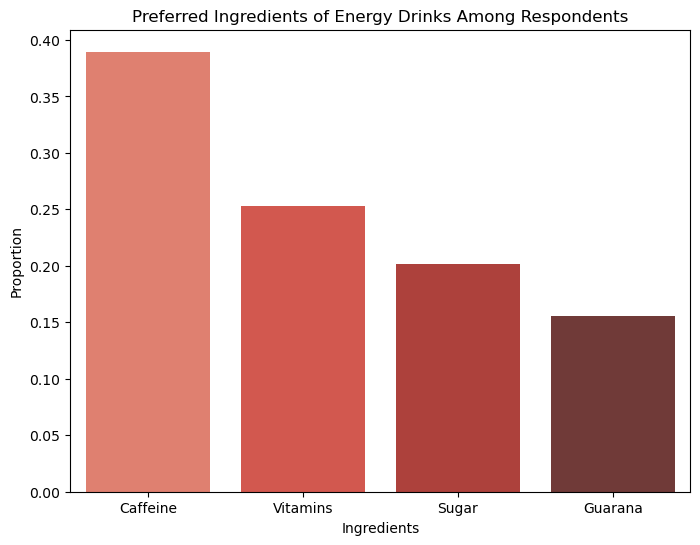

In [94]:
# Create a bar plot for preferred ingredients
plt.figure(figsize=(8, 6))
sns.barplot(x=preferred_ingredients.index, y=preferred_ingredients.values, palette="Reds_d")
plt.xlabel('Ingredients')
plt.ylabel('Proportion')
plt.title('Preferred Ingredients of Energy Drinks Among Respondents')
plt.show()

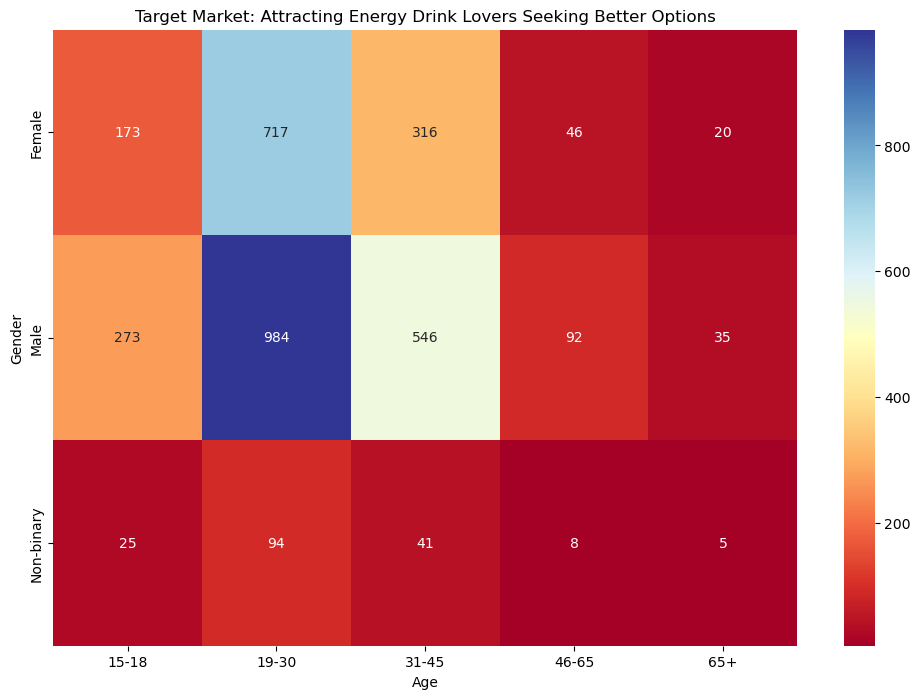

In [99]:
# Convert the series to a DataFrame and reset the index
Target_Market = gender_age_drinking_frequency.reset_index()

# Rename the 0 column to 'Count'
Target_Market = Target_Market.rename(columns={0: 'Count'})


# Create a pivot table for the heatmap
pivot_table = Target_Market.pivot('Gender', 'Age', 'Count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='RdYlBu', fmt='g')
plt.title('Target Market: Attracting Energy Drink Lovers Seeking Better Options')
plt.show()


In [100]:
# Filter the data to create the new DataFrame
tm_df = data[(data['Consume_frequency'].isin(['2-3 times a week', 'Daily'])) &
             ((data['General_perception'].isin(['Not sure', 'Dangerous'])) |
              (data['Improvements_desired'].isin(['Healthier alternatives', 'More natural ingredients'])))]

# Display the first few rows of the new DataFrame
tm_df.head()


,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2
12,103013,120043,2-3 times a week,Before exercise,To enhance sports performance,No,Neutral,Healthy,Yes,4,Not available locally,Gangster,Taste/flavor preference,More natural ingredients,Caffeine,Yes,No,Online ads,Innovative bottle design,No,50-99,Gyms and fitness centers,Studying/working late,Kimaya Borde,19-30,Male,CT113,Bangalore,Tier 1
14,103015,120045,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,Yes,5,Not interested in energy drinks,Bepsi,Availability,Healthier alternatives,Sugar,Yes,Yes,Outdoor billboards,Compact and portable cans,Yes,Above 150,Supermarkets,Social outings/parties,Azad Gera,65+,Male,CT113,Bangalore,Tier 1


In [101]:
# Filter the merged data to include only those where General_perception is either 'Healthy' or 'Effective'
filtered_responses = data[data['General_perception'].isin(['Healthy', 'Effective'])]

# Group by gender and count the responses
gender_and_age_perception = filtered_responses.groupby(['Gender','Age'])['General_perception'].value_counts().unstack()

# Add a total column
gender_and_age_perception['Total'] = gender_and_age_perception.sum(axis=1)

# Display the updated dataframe
gender_and_age_perception

General_perception  Effective  Healthy  Total
Gender     Age                               
Female     15-18          169      146    315
           19-30          320      380    700
           31-45          194       98    292
           46-65           46       12     58
           65+             27       22     49
Male       15-18          330      270    600
           19-30         1170     1016   2186
           31-45          392      128    520
           46-65           71       31    102
           65+             37       27     64
Non-binary 15-18           25       17     42
           19-30           89       80    169
           31-45           26        7     33
           46-65           10        4     14
           65+              3        5      8

In [102]:
# Filter the merged data to include only those where General_perception is either 'Healthy' or 'Effective'
filtered_responses = data[data['General_perception'].isin(['Healthy', 'Effective'])]

# Group by gender and count the responses
gender_and_age_perception = filtered_responses.groupby(['Gender','Age'])['General_perception'].value_counts().unstack()

# Add a total column
gender_and_age_perception['Total'] = gender_and_age_perception.sum(axis=1)

# Display the updated dataframe
gender_and_age_perception


General_perception  Effective  Healthy  Total
Gender     Age                               
Female     15-18          169      146    315
           19-30          320      380    700
           31-45          194       98    292
           46-65           46       12     58
           65+             27       22     49
Male       15-18          330      270    600
           19-30         1170     1016   2186
           31-45          392      128    520
           46-65           71       31    102
           65+             37       27     64
Non-binary 15-18           25       17     42
           19-30           89       80    169
           31-45           26        7     33
           46-65           10        4     14
           65+              3        5      8

In [103]:
# Calculate the count of responses per gender
gender_counts = filtered_responses['Gender'].value_counts()

def gender_totals(row):
    if row.name[0] == 'Male':
        return row['Total'] / gender_counts['Male']
    elif row.name[0] == 'Female':
        return row['Total'] / gender_counts['Female']
    else:
        return row['Total'] / gender_counts['Non-binary']

# Divide the 'Total' column by the total number per gender
gender_and_age_perception['Percentage'] = gender_and_age_perception.apply(gender_totals, axis=1)

gender_and_age_perception

General_perception  Effective  Healthy  Total  Percentage
Gender     Age                                           
Female     15-18          169      146    315    0.222772
           19-30          320      380    700    0.495050
           31-45          194       98    292    0.206506
           46-65           46       12     58    0.041018
           65+             27       22     49    0.034653
Male       15-18          330      270    600    0.172811
           19-30         1170     1016   2186    0.629608
           31-45          392      128    520    0.149770
           46-65           71       31    102    0.029378
           65+             37       27     64    0.018433
Non-binary 15-18           25       17     42    0.157895
           19-30           89       80    169    0.635338
           31-45           26        7     33    0.124060
           46-65           10        4     14    0.052632
           65+              3        5      8    0.030075

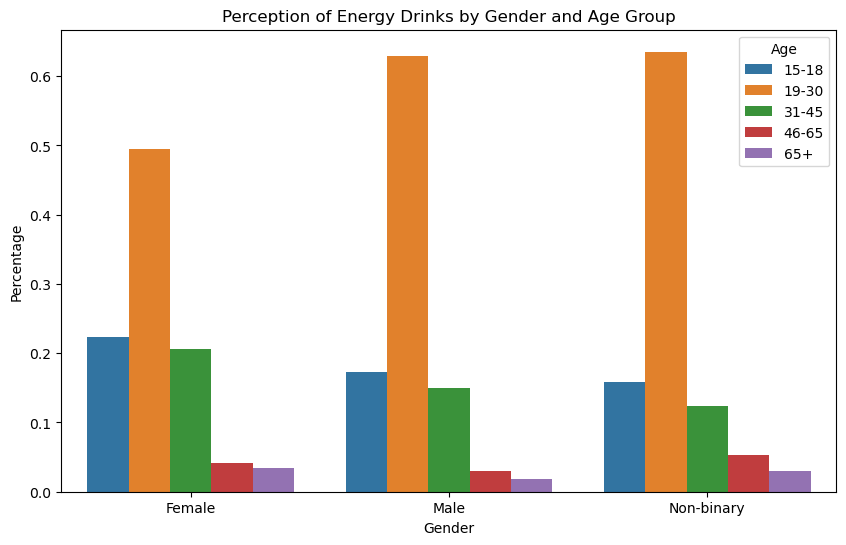

In [104]:
# Reset the index of gender_perception
gender_and_age_perception = gender_and_age_perception.reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Percentage', hue='Age', data=gender_and_age_perception)
plt.title('Perception of Energy Drinks by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


In [105]:
# Filter the dataframe for the 15-30 age group
youth_df = data[data['Age'].isin(['15-18', '19-30'])]

# Count the number of responses by marketing channel
marketing_channels = youth_df['Marketing_channels'].value_counts()

# Display the result
marketing_channels


Online ads            3373
TV commercials        1785
Other                  702
Outdoor billboards     702
Print media            446
Name: Marketing_channels, dtype: int64

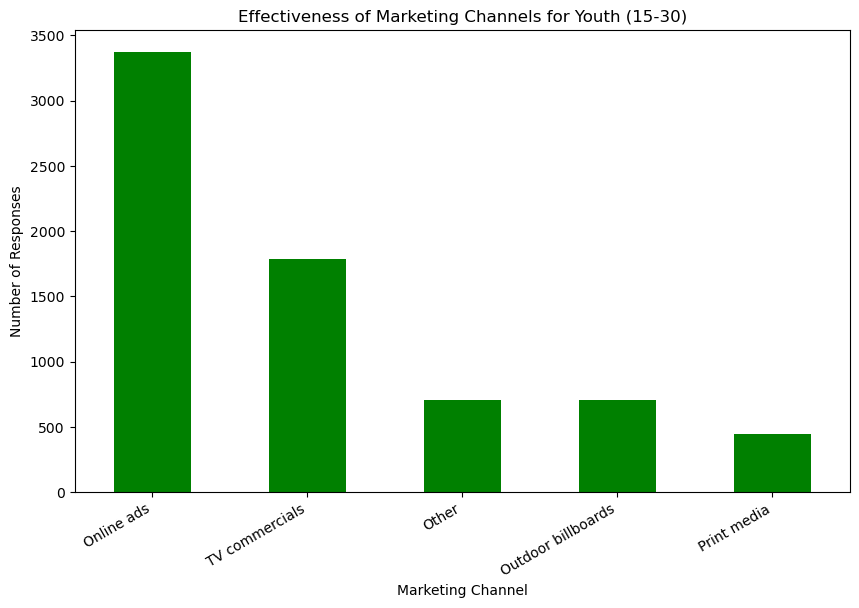

In [106]:
# Create a bar plot for marketing channel effectiveness
plt.figure(figsize=(10, 6))
marketing_channels.plot(kind='bar', color='green')
plt.title('Effectiveness of Marketing Channels for Youth (15-30)')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Responses')
plt.xticks(rotation=30, ha='right')
plt.show()


In [107]:
# Count the number of responses by marketing channel
tm_marketing_channels = tm_df['Marketing_channels'].value_counts()

# Display the result
tm_marketing_channels

Online ads            1322
TV commercials         927
Outdoor billboards     417
Other                  411
Print media            298
Name: Marketing_channels, dtype: int64

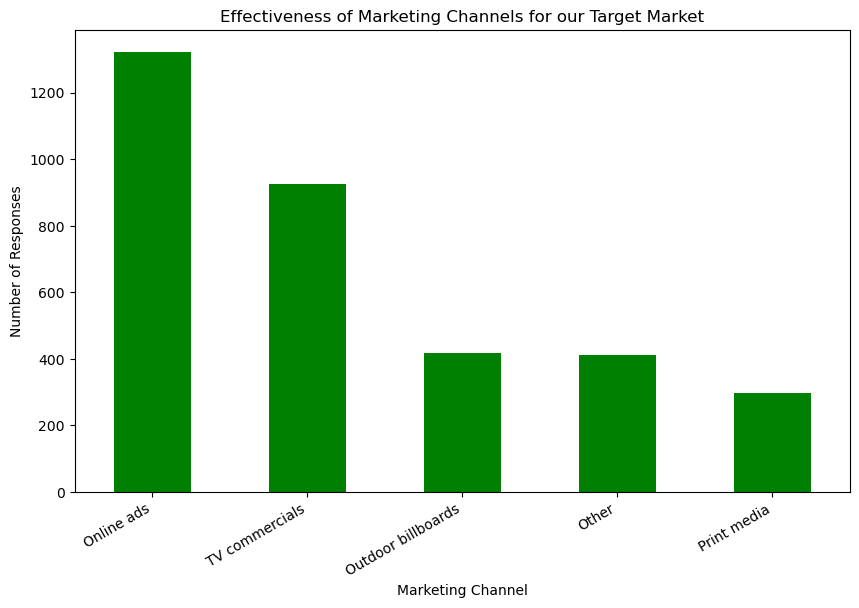

In [108]:
# Create a bar plot for marketing channel effectiveness
plt.figure(figsize=(10, 6))
tm_marketing_channels.plot(kind='bar', color='green')
plt.title('Effectiveness of Marketing Channels for our Target Market')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Responses')
plt.xticks(rotation=30, ha='right')
plt.show()

In [109]:
# Check how brand perception varies across different age groups
brand_perception_by_age = data.groupby('Age')['Brand_perception'].value_counts(normalize=True).unstack()

# Check how brand perception varies across different genders
brand_perception_by_gender = data.groupby('Gender')['Brand_perception'].value_counts(normalize=True).unstack()

brand_perception_by_age, brand_perception_by_gender


(Brand_perception  Negative   Neutral  Positive
 Age                                           
 15-18             0.174731  0.595430  0.229839
 19-30             0.176812  0.601993  0.221196
 31-45             0.176347  0.593434  0.230219
 46-65             0.180751  0.593897  0.225352
 65+               0.194737  0.536842  0.268421,
 Brand_perception  Negative   Neutral  Positive
 Gender                                        
 Female            0.189870  0.587554  0.222576
 Male              0.169924  0.601192  0.228884
 Non-binary        0.171598  0.619329  0.209073)

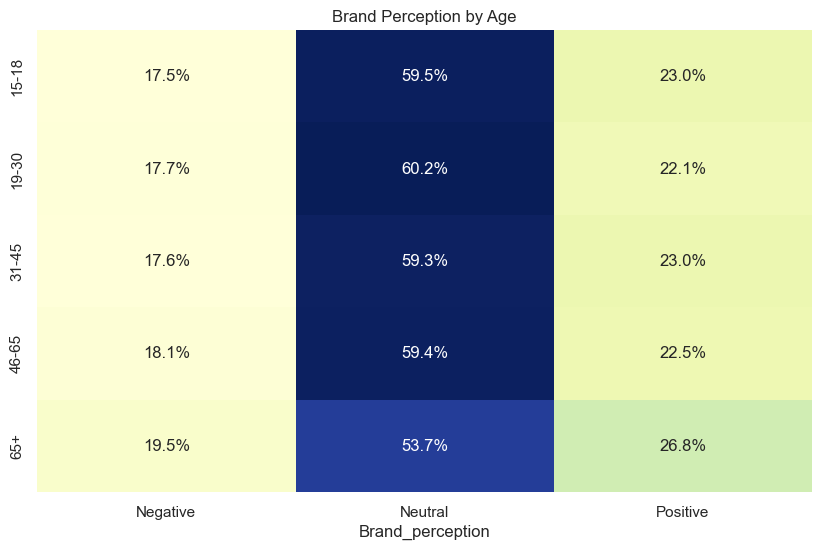

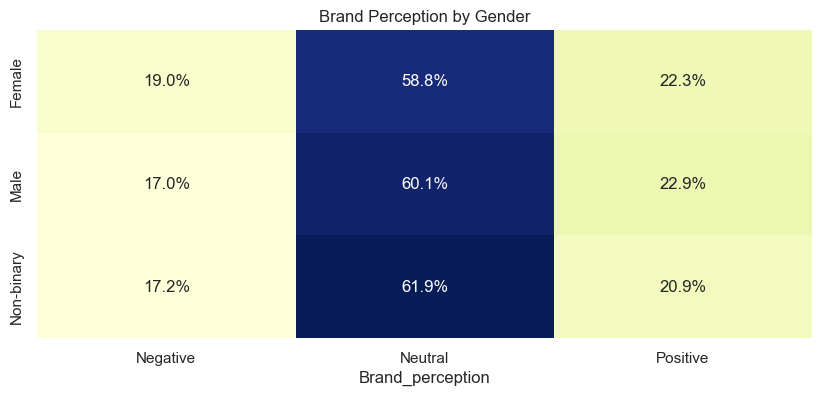

In [110]:
# Set the style for seaborn plot
sns.set(style="whitegrid")

# Brand Perception by Age
plt.figure(figsize=(10, 6))
sns.heatmap(brand_perception_by_age, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Brand Perception by Age')
plt.ylabel('')
plt.show()

# Brand Perception by Gender
plt.figure(figsize=(10, 4))
sns.heatmap(brand_perception_by_gender, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Brand Perception by Gender')
plt.ylabel('')
plt.show()


In [111]:
# Check packaging preference across different age groups
packaging_pref_by_age = data.groupby('Age')['Packaging_preference'].value_counts(normalize=True).unstack()

# Check packaging preference across different genders
packaging_pref_by_gender = data.groupby('Gender')['Packaging_preference'].value_counts(normalize=True).unstack()

packaging_pref_by_age, packaging_pref_by_gender


(Packaging_preference  Collectible packaging  Compact and portable cans  \
 Age                                                                      
 15-18                              0.145833                   0.405242   
 19-30                              0.153986                   0.399457   
 31-45                              0.140572                   0.394781   
 46-65                              0.161972                   0.370892   
 65+                                0.163158                   0.421053   
 
 Packaging_preference  Eco-friendly design  Innovative bottle design     Other  
 Age                                                                            
 15-18                            0.100134                  0.307796  0.040995  
 19-30                            0.096920                  0.300000  0.049638  
 31-45                            0.106481                  0.312710  0.045455  
 46-65                            0.063380                  0.330986

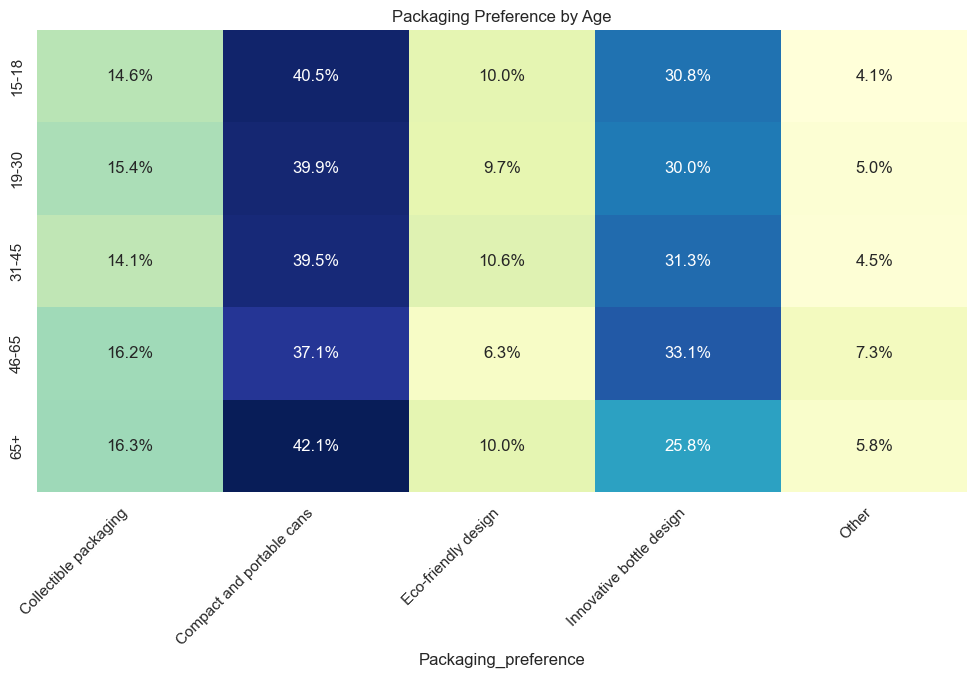

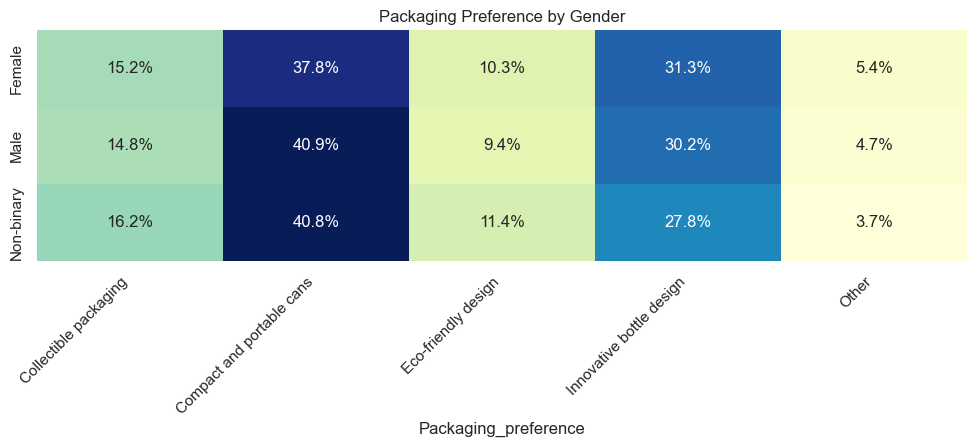

In [112]:
# Packaging Preference by Age
plt.figure(figsize=(12, 6))
sns.heatmap(packaging_pref_by_age, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Packaging Preference by Age')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

# Packaging Preference by Gender
plt.figure(figsize=(12, 3))
sns.heatmap(packaging_pref_by_gender, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Packaging Preference by Gender')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [113]:
# Check the main reasons for consuming energy drinks across different age groups
reasons_by_age = data.groupby('Age')['Consume_reason'].value_counts(normalize=True).unstack()

# Check the main reasons for consuming energy drinks across different genders
reasons_by_gender = data.groupby('Gender')['Consume_reason'].value_counts(normalize=True).unstack()

reasons_by_age, reasons_by_gender


(Consume_reason  Increased energy and focus     Other  To boost performance  \
 Age                                                                          
 15-18                             0.360887  0.086694              0.153226   
 19-30                             0.355616  0.087862              0.151268   
 31-45                             0.359007  0.087963              0.145623   
 46-65                             0.361502  0.089202              0.176056   
 65+                               0.352632  0.100000              0.157895   
 
 Consume_reason  To combat fatigue  To enhance sports performance  
 Age                                                               
 15-18                    0.233871                       0.165323  
 19-30                    0.247826                       0.157428  
 31-45                    0.247896                       0.159512  
 46-65                    0.190141                       0.183099  
 65+                      0.221053   

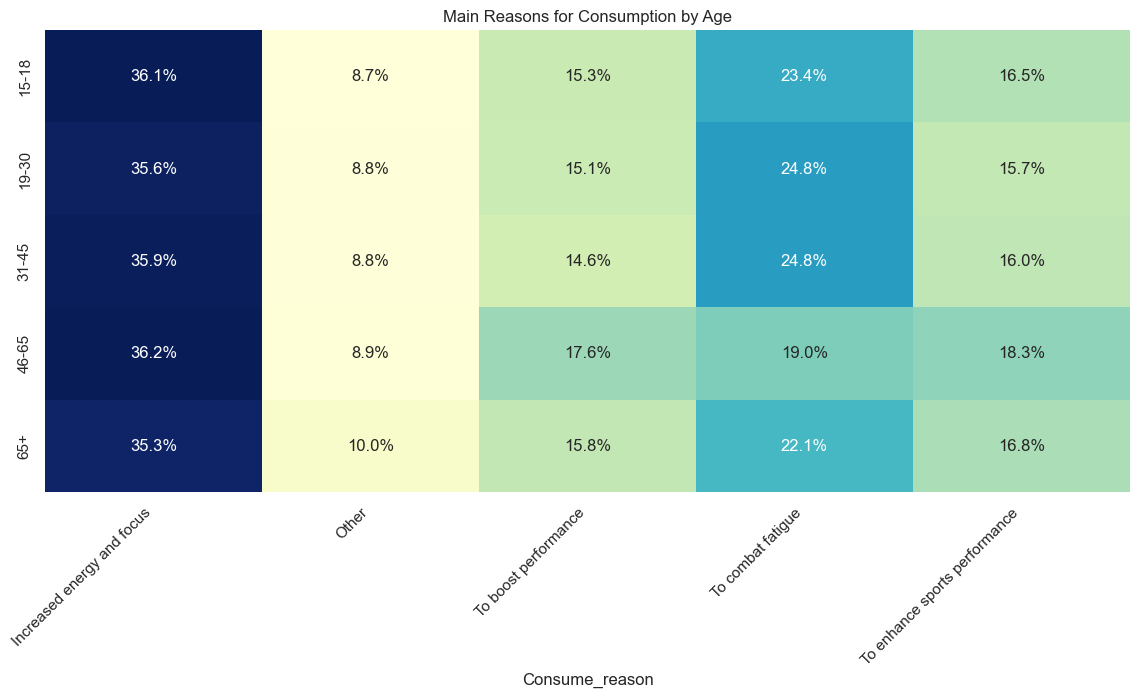

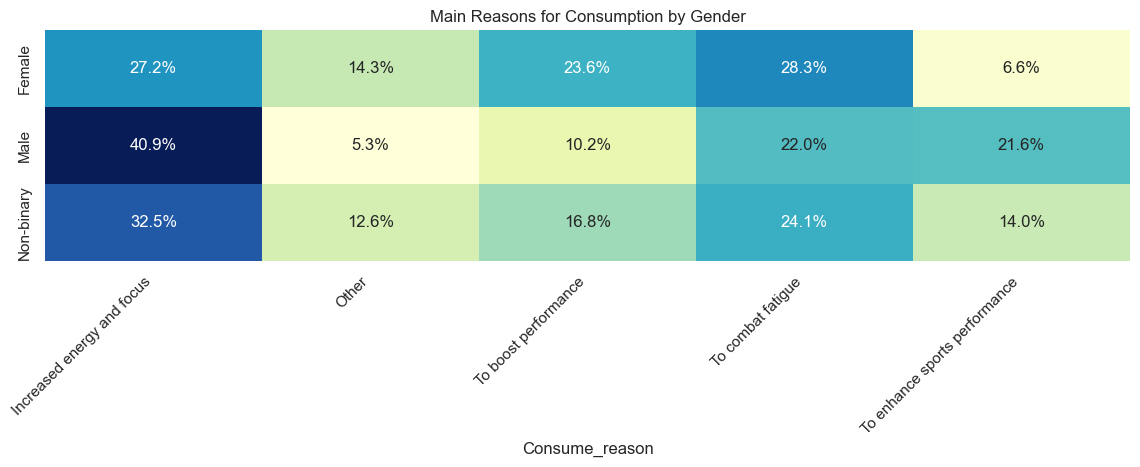

In [114]:
# Main Reasons for Consumption by Age
plt.figure(figsize=(14, 6))
sns.heatmap(reasons_by_age, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Main Reasons for Consumption by Age')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

# Main Reasons for Consumption by Gender
plt.figure(figsize=(14, 3))
sns.heatmap(reasons_by_gender, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Main Reasons for Consumption by Gender')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()


In [115]:
# Check the perception of energy drinks in general across different age groups
perception_by_age = data.groupby('Age')['General_perception'].value_counts(normalize=True).unstack()

# Check the perception of energy drinks in general across different genders
perception_by_gender = data.groupby('Gender')['General_perception'].value_counts(normalize=True).unstack()

perception_by_age, perception_by_gender


(General_perception  Dangerous  Effective   Healthy  Not sure
 Age                                                         
 15-18                0.054435   0.352151  0.290995  0.302419
 19-30                0.117391   0.286051  0.267391  0.329167
 31-45                0.541667   0.257576  0.098064  0.102694
 46-65                0.502347   0.298122  0.110329  0.089202
 65+                  0.042105   0.352632  0.284211  0.321053,
 General_perception  Dangerous  Effective   Healthy  Not sure
 Gender                                                      
 Female               0.294067   0.218813  0.190449  0.296671
 Male                 0.187645   0.331236  0.243789  0.237330
 Non-binary           0.175542   0.301775  0.222880  0.299803)

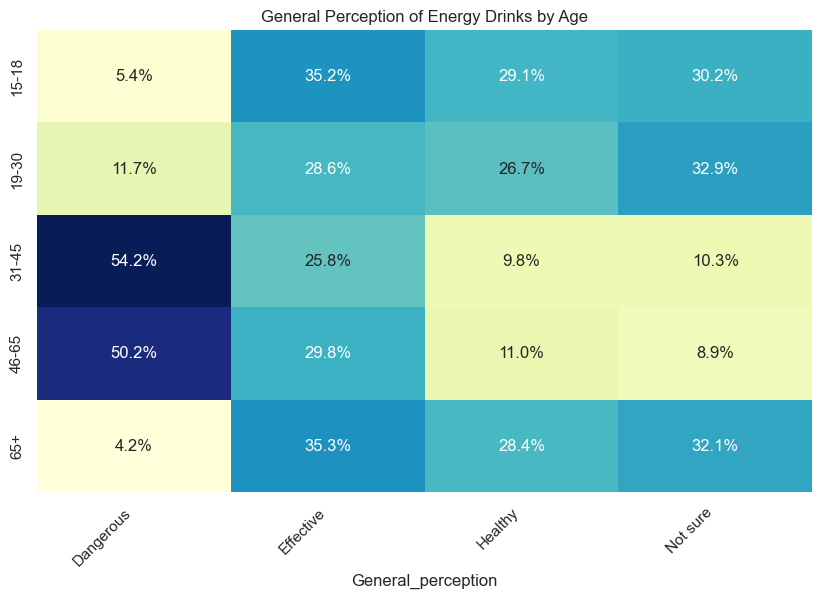

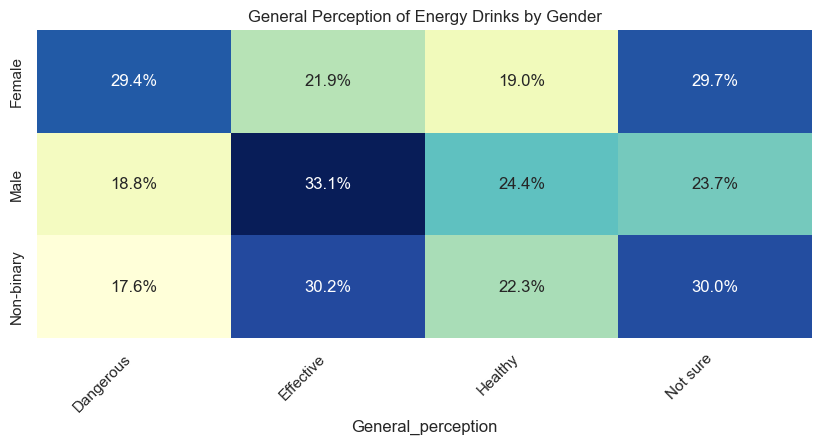

In [116]:
# General Perception by Age
plt.figure(figsize=(10, 6))
sns.heatmap(perception_by_age, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('General Perception of Energy Drinks by Age')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

# General Perception by Gender
plt.figure(figsize=(10, 4))
sns.heatmap(perception_by_gender, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('General Perception of Energy Drinks by Gender')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()


In [117]:
# Check the preferred ingredients among respondents
preferred_ingredients = data['Ingredients_expected'].value_counts(normalize=True)

preferred_ingredients


Caffeine    0.3896
Vitamins    0.2534
Sugar       0.2017
Guarana     0.1553
Name: Ingredients_expected, dtype: float64

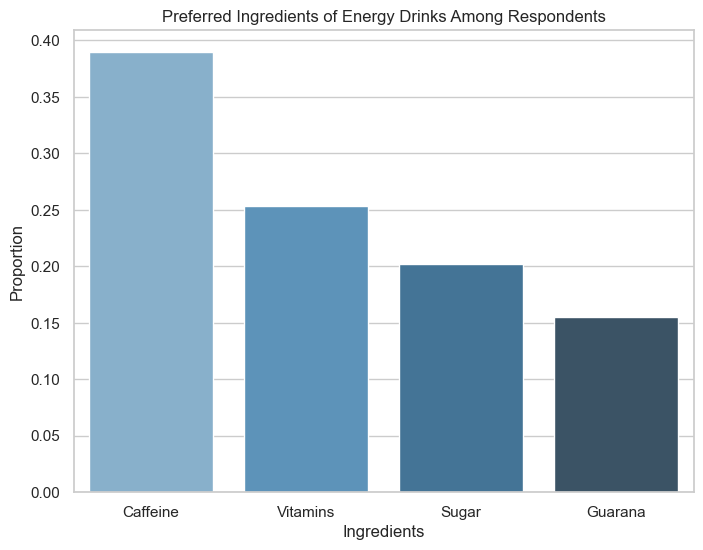

In [118]:
# Create a bar plot for preferred ingredients
plt.figure(figsize=(8, 6))
sns.barplot(x=preferred_ingredients.index, y=preferred_ingredients.values, palette="Blues_d")
plt.xlabel('Ingredients')
plt.ylabel('Proportion')
plt.title('Preferred Ingredients of Energy Drinks Among Respondents')
plt.show()

In [23]:
# Create a DataFrame
tm_df = pd.DataFrame(data)

# Check the preferred ingredients among respondents
tm_preferred_ingredients = tm_df['Ingredients_expected'].value_counts(normalize=True)

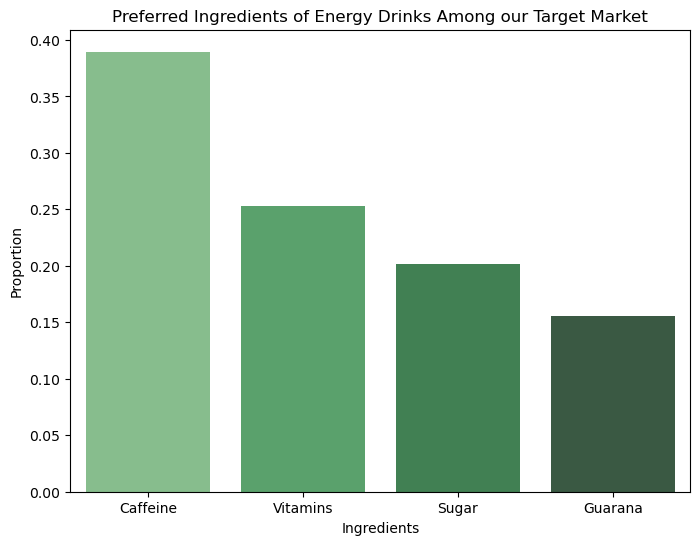

In [24]:
# Create a bar plot for preferred ingredients
plt.figure(figsize=(8, 6))
sns.barplot(x=tm_preferred_ingredients.index, y=tm_preferred_ingredients.values, palette="Greens_d")
plt.xlabel('Ingredients')
plt.ylabel('Proportion')
plt.title('Preferred Ingredients of Energy Drinks Among our Target Market')
plt.show()

In [25]:
# Check the packaging preference for the general population
packaging_pref_general = data['Packaging_preference'].value_counts(normalize=True)

packaging_pref_general

Compact and portable cans    0.3984
Innovative bottle design     0.3047
Collectible packaging        0.1501
Eco-friendly design          0.0983
Other                        0.0485
Name: Packaging_preference, dtype: float64

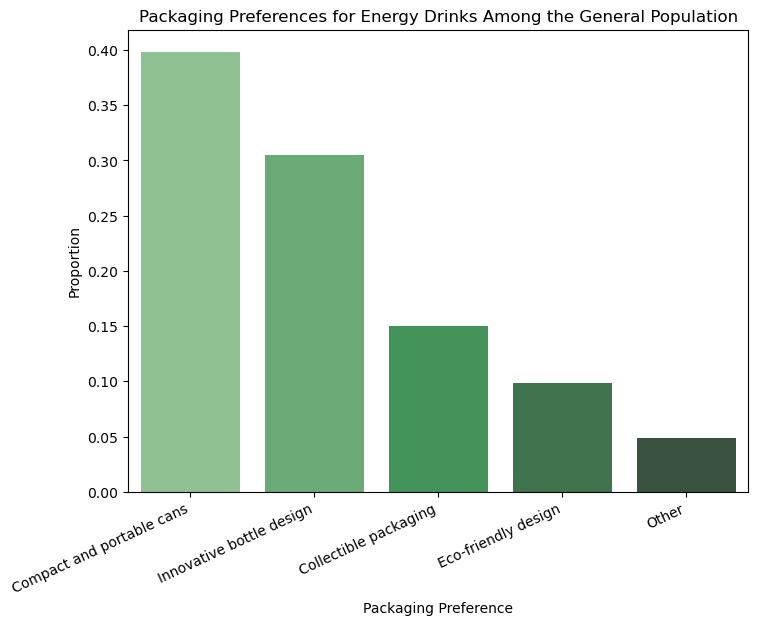

In [26]:
# Create a bar plot for packaging preferences for the general population
plt.figure(figsize=(8, 6))
sns.barplot(x=packaging_pref_general.index, y=packaging_pref_general.values, palette="Greens_d")
plt.xlabel('Packaging Preference')
plt.ylabel('Proportion')
plt.title('Packaging Preferences for Energy Drinks Among the General Population')
plt.xticks(rotation=25, ha='right')
plt.show()

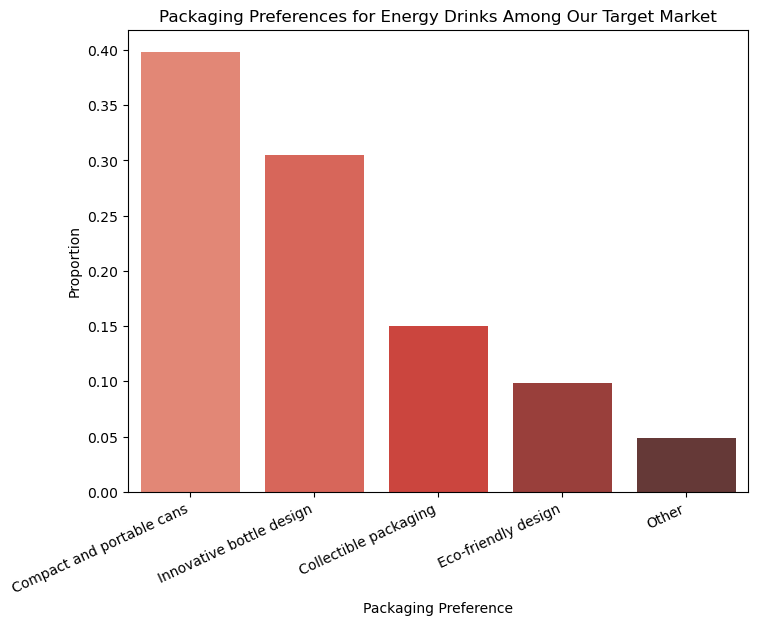

In [27]:
# Check the packaging preference for the general population
packaging_pref_tm = tm_df['Packaging_preference'].value_counts(normalize=True)

# Create a bar plot for packaging preferences for the general population
plt.figure(figsize=(8, 6))
sns.barplot(x=packaging_pref_tm.index, y=packaging_pref_tm.values, palette="Reds_d")
plt.xlabel('Packaging Preference')
plt.ylabel('Proportion')
plt.title('Packaging Preferences for Energy Drinks Among Our Target Market')
plt.xticks(rotation=25, ha='right')
plt.show()

In [28]:
# Check the current market leaders
market_leaders = data['Current_brands'].value_counts(normalize=True)

market_leaders

Cola-Coka    0.2538
Bepsi        0.2112
Gangster     0.1854
Blue Bull    0.1058
CodeX        0.0980
Sky 9        0.0979
Others       0.0479
Name: Current_brands, dtype: float64

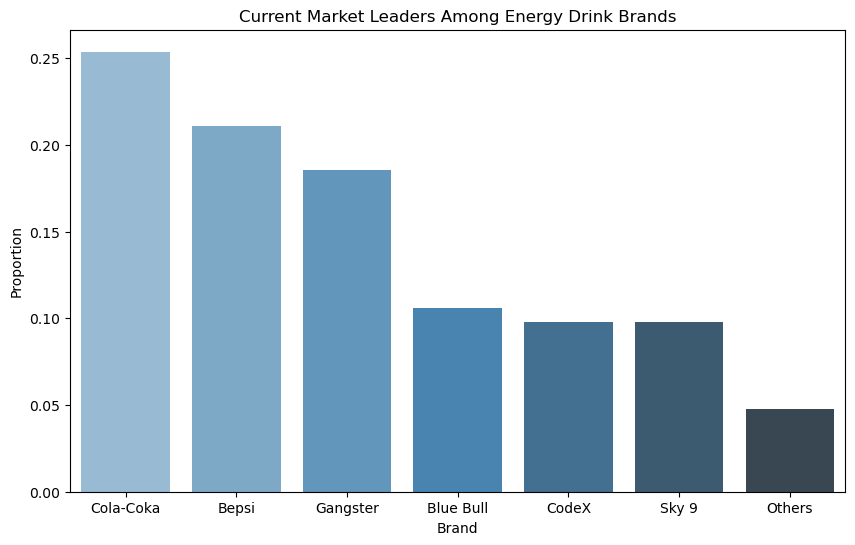

In [29]:
# Create a bar plot for market leaders
plt.figure(figsize=(10, 6))
sns.barplot(x=market_leaders.index, y=market_leaders.values, palette="Blues_d")
plt.xlabel('Brand')
plt.ylabel('Proportion')
plt.title('Current Market Leaders Among Energy Drink Brands')
plt.show()


In [30]:
# Check the current market leaders
market_leaders_tm = tm_df['Current_brands'].value_counts(normalize=True)

market_leaders_tm

Cola-Coka    0.2538
Bepsi        0.2112
Gangster     0.1854
Blue Bull    0.1058
CodeX        0.0980
Sky 9        0.0979
Others       0.0479
Name: Current_brands, dtype: float64

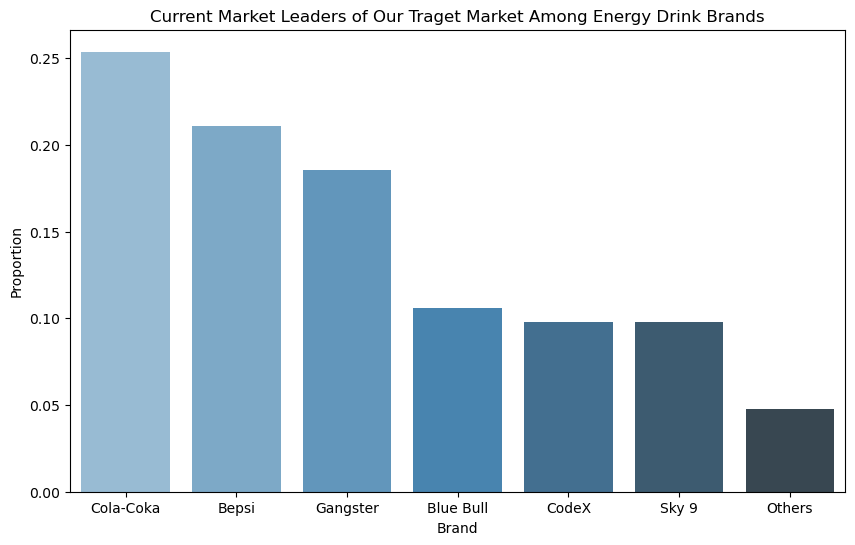

In [31]:
# Create a bar plot for market leaders
plt.figure(figsize=(10, 6))
sns.barplot(x=market_leaders_tm.index, y=market_leaders_tm.values, palette="Blues_d")
plt.xlabel('Brand')
plt.ylabel('Proportion')
plt.title('Current Market Leaders of Our Traget Market Among Energy Drink Brands')
plt.show()

In [32]:
# Extracting the reasons for choosing other brands over ours
reasons_for_choosing_brands = data[data['Current_brands'] != 'CodeX'] ['Reasons_for_choosing_brands'].value_counts()

reasons_for_choosing_brands

Brand reputation           2393
Taste/flavor preference    1829
Availability               1715
Effectiveness              1572
Other                      1511
Name: Reasons_for_choosing_brands, dtype: int64

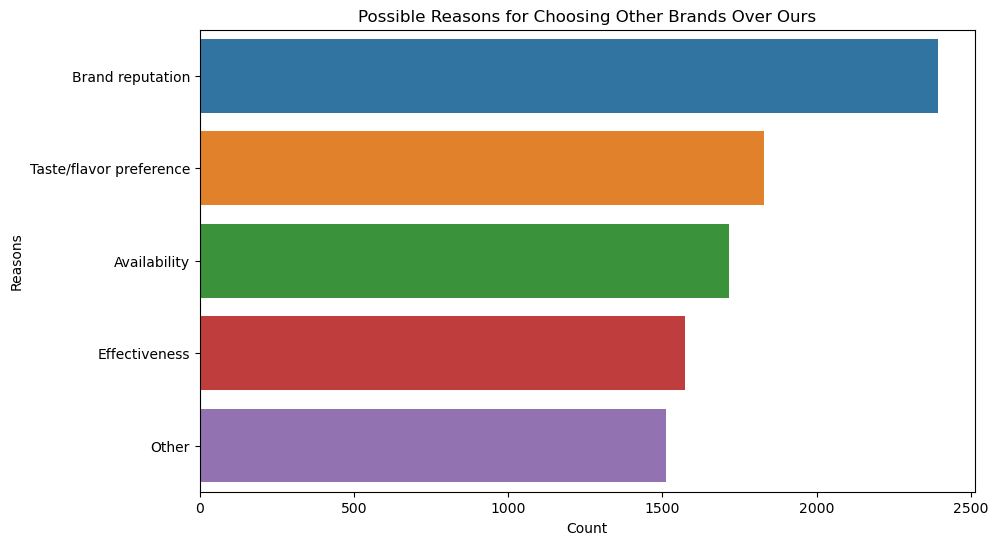

In [33]:
# Plotting the reasons for choosing other brands
plt.figure(figsize=(10, 6))
sns.barplot(y=reasons_for_choosing_brands.index, x=reasons_for_choosing_brands.values, orient='h')
plt.title('Possible Reasons for Choosing Other Brands Over Ours')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.show()


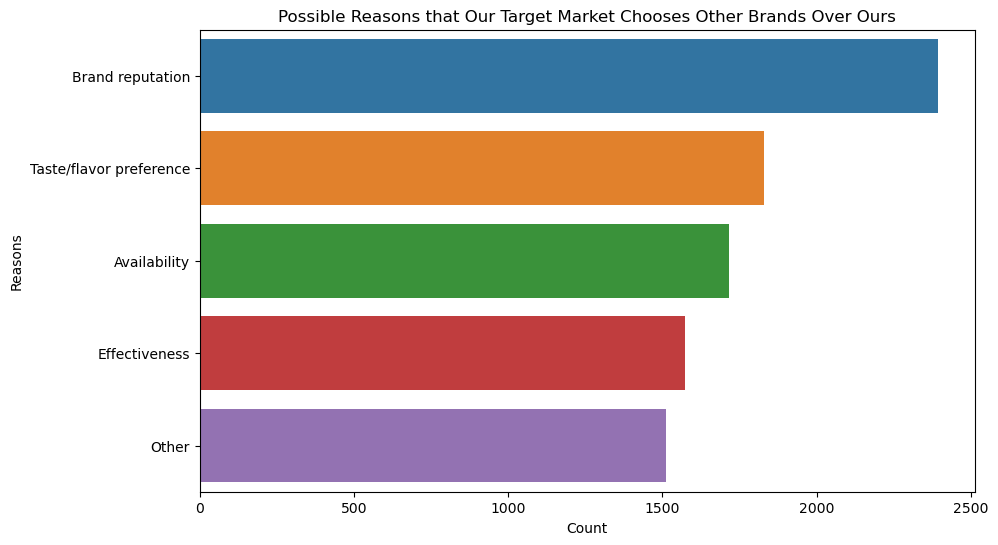

In [34]:
# Extracting the reasons for choosing other brands over ours
reasons_for_choosing_brands_tm = tm_df[tm_df['Current_brands'] != 'CodeX'] ['Reasons_for_choosing_brands'].value_counts()

reasons_for_choosing_brands_tm


# Plotting the reasons for choosing other brands
plt.figure(figsize=(10, 6))
sns.barplot(y=reasons_for_choosing_brands_tm.index, x=reasons_for_choosing_brands_tm.values, orient='h')
plt.title('Possible Reasons that Our Target Market Chooses Other Brands Over Ours')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.show()

In [35]:
# Extracting the marketing channels data
marketing_channels = data['Marketing_channels'].value_counts()

marketing_channels

Online ads            4020
TV commercials        2688
Outdoor billboards    1226
Other                 1225
Print media            841
Name: Marketing_channels, dtype: int64

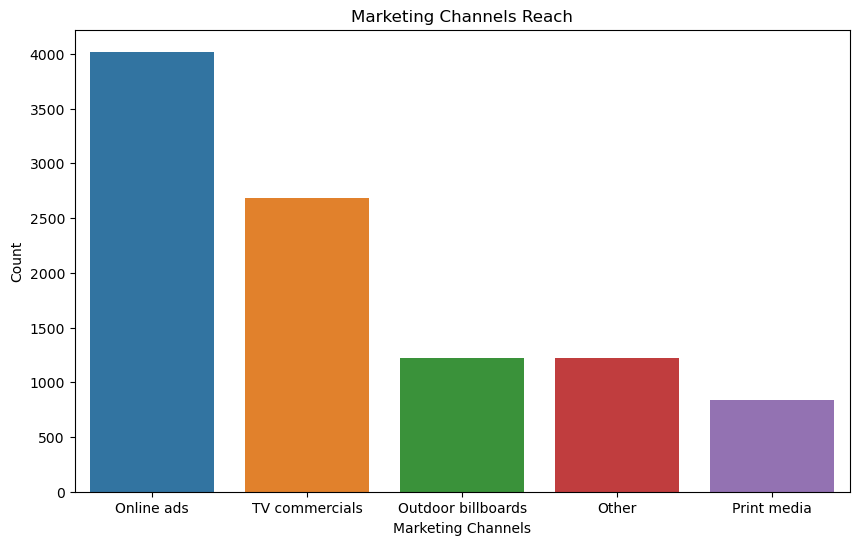

In [36]:
# Plotting the marketing channels
plt.figure(figsize=(10, 6))
sns.barplot(x=marketing_channels.index, y=marketing_channels.values)
plt.title('Marketing Channels Reach')
plt.xlabel('Marketing Channels')
plt.ylabel('Count')
plt.show()


In [37]:
# Grouping and filtering the data to count the number of respondents who have heard before
effectiveness_df = data[data['Heard_before'] == 'Yes'].groupby('Marketing_channels').size().reset_index(name='Count')

effectiveness_df.sort_values(by='Count', ascending=False)



,Marketing_channels,Count
0,Online ads,1805
4,TV commercials,1257
2,Outdoor billboards,524
1,Other,490
3,Print media,371


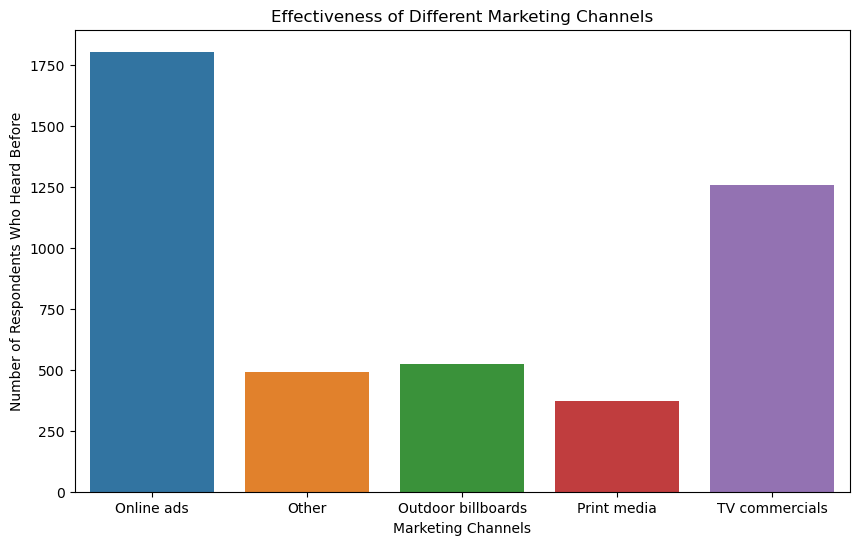

In [38]:
# Plotting the effectiveness of different marketing strategies
plt.figure(figsize=(10, 6))
sns.barplot(x='Marketing_channels', y='Count', data=effectiveness_df)
plt.title('Effectiveness of Different Marketing Channels')
plt.xlabel('Marketing Channels')
plt.ylabel('Number of Respondents Who Heard Before')
plt.show()


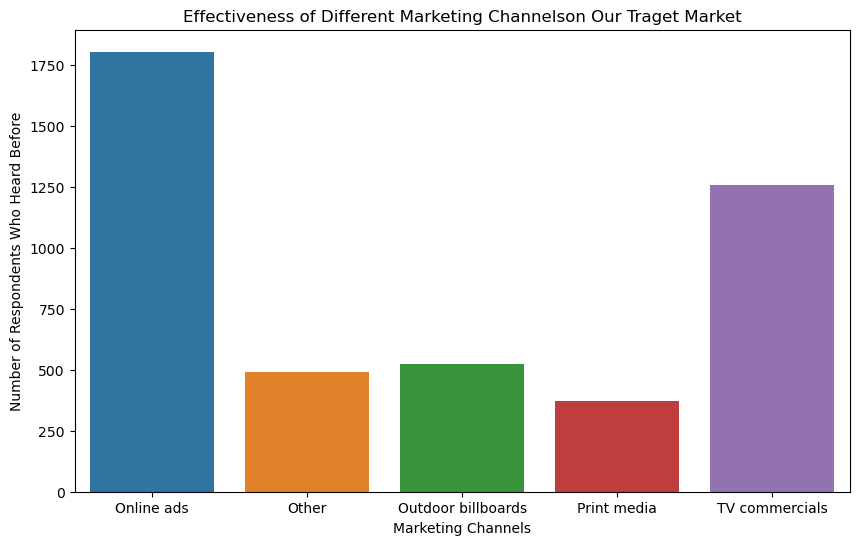

In [39]:
# Grouping and filtering the data to count the number of respondents who have heard before
effectiveness_df_tm = tm_df[tm_df['Heard_before'] == 'Yes'].groupby('Marketing_channels').size().reset_index(name='Count')

effectiveness_df_tm.sort_values(by='Count', ascending=False)


# Plotting the effectiveness of different marketing strategies
plt.figure(figsize=(10, 6))
sns.barplot(x='Marketing_channels', y='Count', data=effectiveness_df_tm)
plt.title('Effectiveness of Different Marketing Channelson Our Traget Market')
plt.xlabel('Marketing Channels')
plt.ylabel('Number of Respondents Who Heard Before')
plt.show()



In [40]:
# Extracting the overall brand perception data
brand_perception = data['Brand_perception'].value_counts()

brand_perception


Neutral     5974
Positive    2257
Negative    1769
Name: Brand_perception, dtype: int64

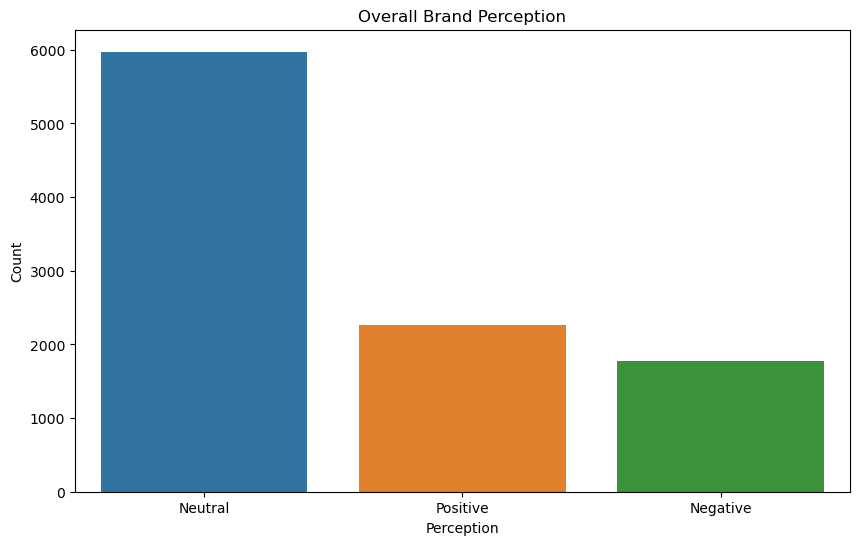

In [41]:
# Plotting the overall brand perception
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_perception.index, y=brand_perception.values)
plt.title('Overall Brand Perception')
plt.xlabel('Perception')
plt.ylabel('Count')
plt.show()


In [43]:
# Extracting the overall brand perception data
brand_perception_tm = tm_df['Brand_perception'].value_counts()

brand_perception_tm

Neutral     5974
Positive    2257
Negative    1769
Name: Brand_perception, dtype: int64

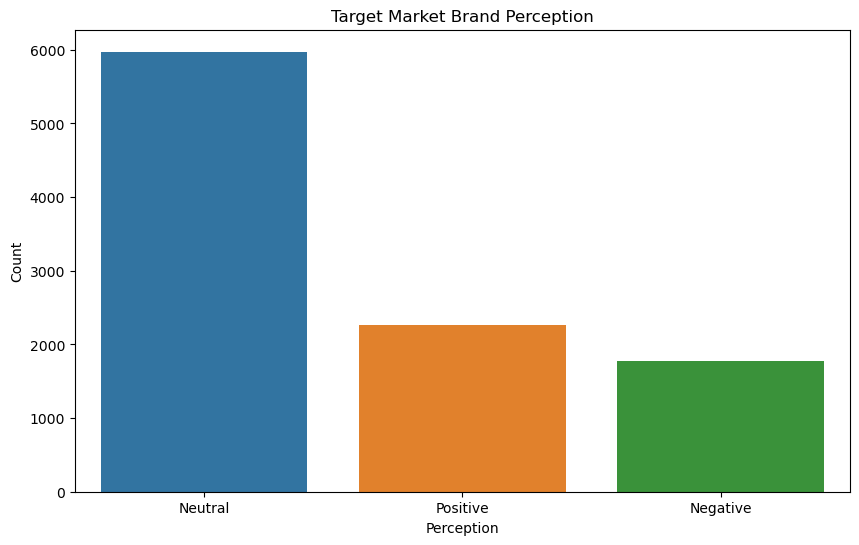

In [44]:
# Plotting the overall brand perception
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_perception_tm.index, y=brand_perception_tm.values)
plt.title('Target Market Brand Perception')
plt.xlabel('Perception')
plt.ylabel('Count')
plt.show()

In [45]:
# Extracting the city-wise distribution of respondents
city_focus = data[data['Heard_before'] == 'No']['City'].value_counts()

city_focus

Bangalore    1670
Hyderabad    1105
Mumbai        611
Chennai       565
Pune          529
Kolkata       356
Ahmedabad     249
Jaipur        216
Delhi         162
Lucknow        90
Name: City, dtype: int64

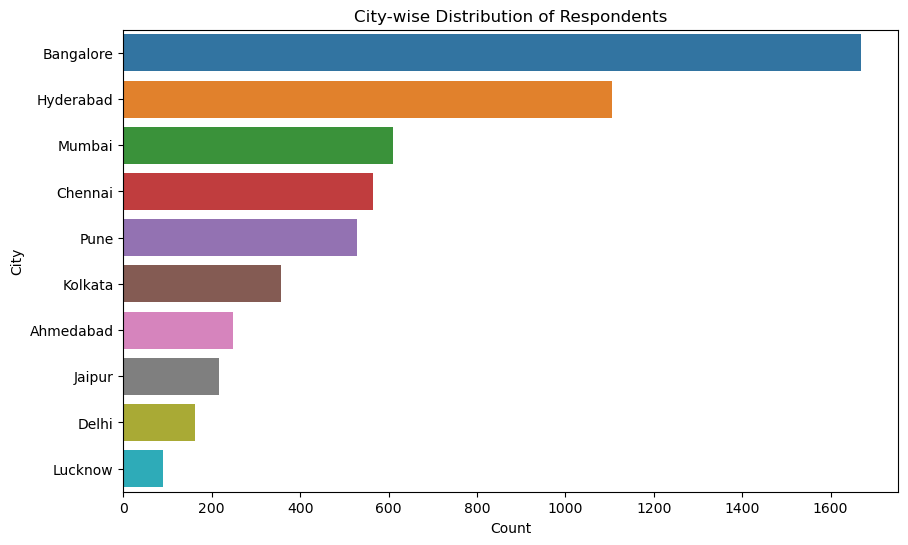

In [46]:
# Plotting the city-wise distribution of respondents
plt.figure(figsize=(10, 6))
sns.barplot(y=city_focus.index, x=city_focus.values, orient='h')
plt.title('City-wise Distribution of Respondents')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


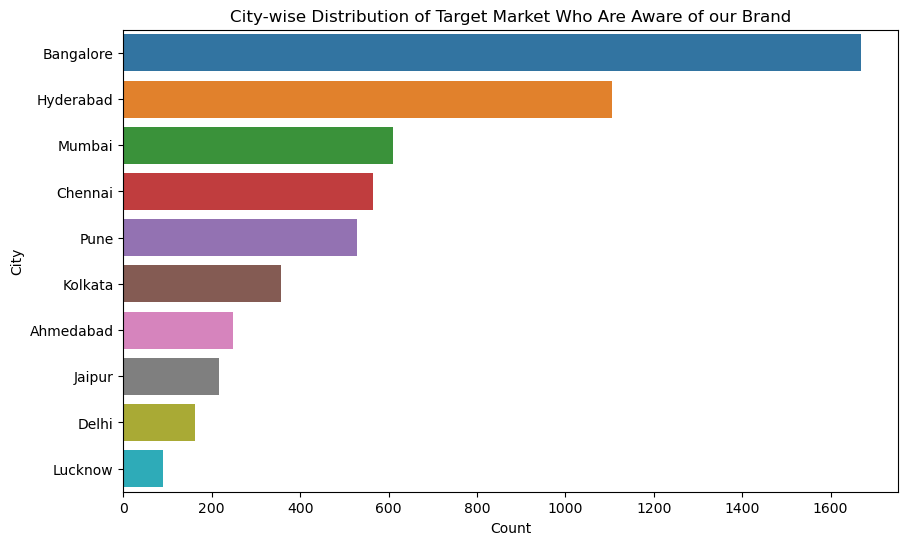

In [47]:
# Extracting the city-wise distribution of respondents
dw_city_focus_tm = tm_df[tm_df['Heard_before'] == 'No']['City'].value_counts()

dw_city_focus_tm

# Plotting the city-wise distribution of respondents
plt.figure(figsize=(10, 6))
sns.barplot(y=dw_city_focus_tm.index, x=dw_city_focus_tm.values, orient='h')
plt.title('City-wise Distribution of Target Market Who Are Aware of our Brand')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


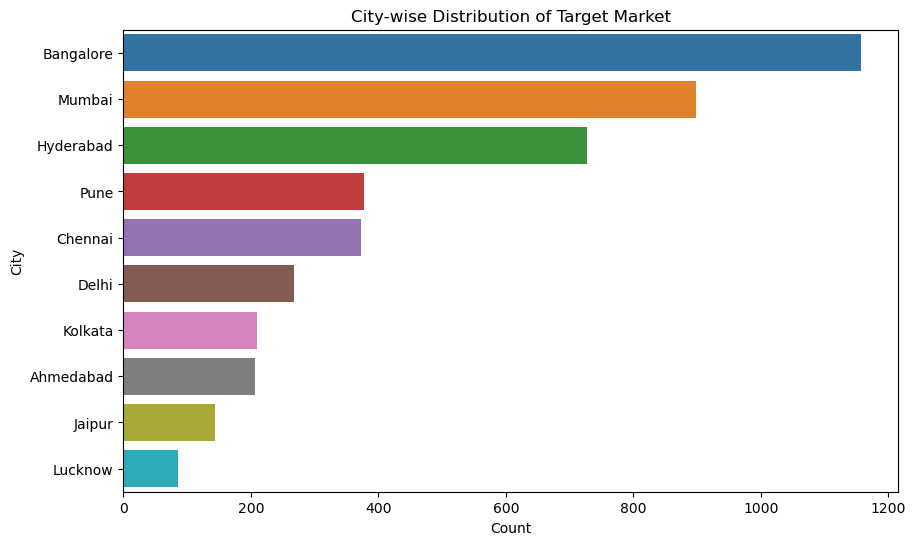

In [48]:
# Extracting the city-wise distribution of respondents
city_focus_tm = data[data['Heard_before'] == 'Yes']['City'].value_counts()

city_focus_tm

# Plotting the city-wise distribution of respondents
plt.figure(figsize=(10, 6))
sns.barplot(y=city_focus_tm.index, x=city_focus_tm.values, orient='h')
plt.title('City-wise Distribution of Target Market')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

In [49]:
# Extracting the preferred purchase locations data
purchase_location = data['Purchase_location'].value_counts()

purchase_location


Supermarkets                4494
Online retailers            2550
Gyms and fitness centers    1464
Local stores                 813
Other                        679
Name: Purchase_location, dtype: int64

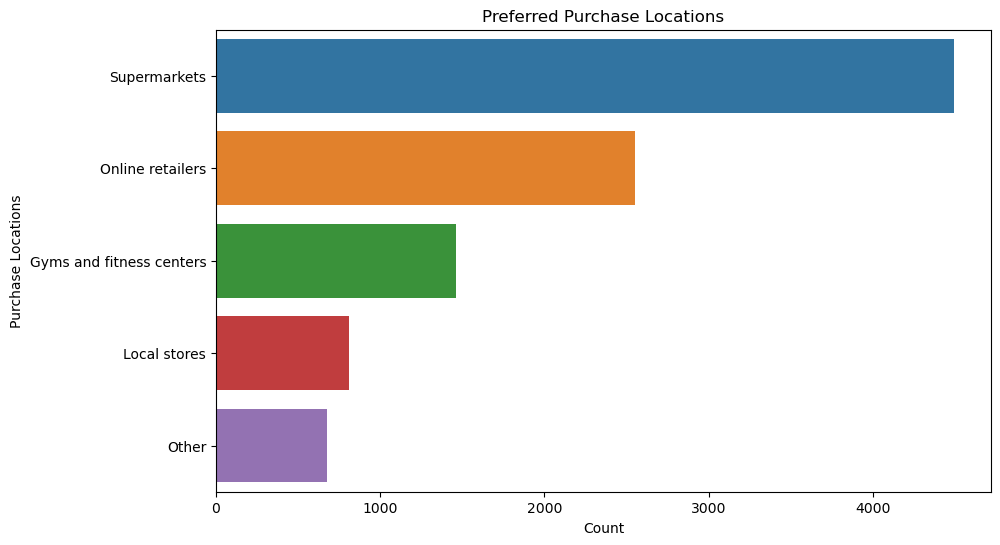

In [50]:
# Plotting the preferred purchase locations
plt.figure(figsize=(10, 6))
sns.barplot(y=purchase_location.index, x=purchase_location.values, orient='h')
plt.title('Preferred Purchase Locations')
plt.xlabel('Count')
plt.ylabel('Purchase Locations')
plt.show()


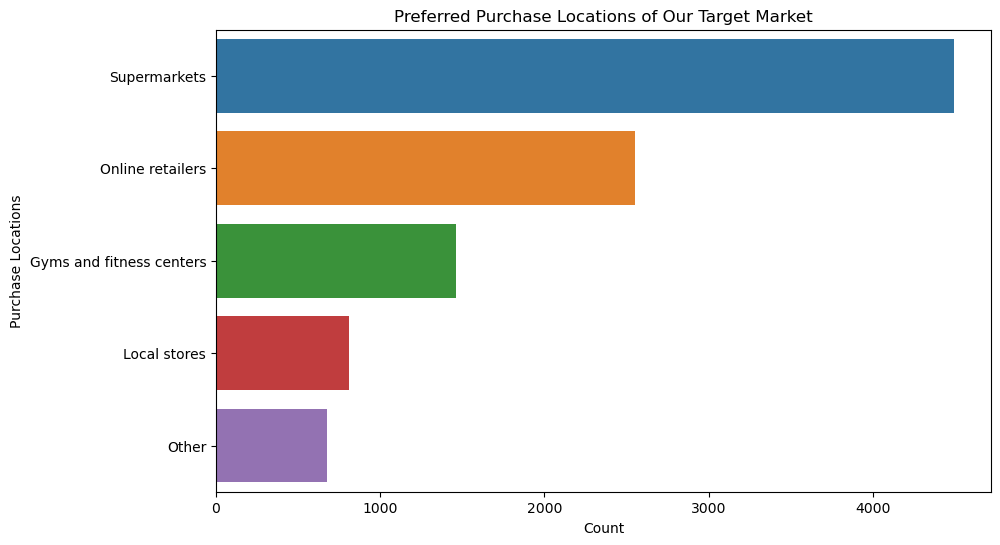

In [51]:
# Extracting the preferred purchase locations data
purchase_location_tm = tm_df['Purchase_location'].value_counts()

purchase_location_tm

# Plotting the preferred purchase locations
plt.figure(figsize=(10, 6))
sns.barplot(y=purchase_location_tm.index, x=purchase_location_tm.values, orient='h')
plt.title('Preferred Purchase Locations of Our Target Market')
plt.xlabel('Count')
plt.ylabel('Purchase Locations')
plt.show()


In [52]:
# Extracting the typical consumption situations data
consumption_situation = data['Typical_consumption_situations'].value_counts()

consumption_situation


Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: Typical_consumption_situations, dtype: int64

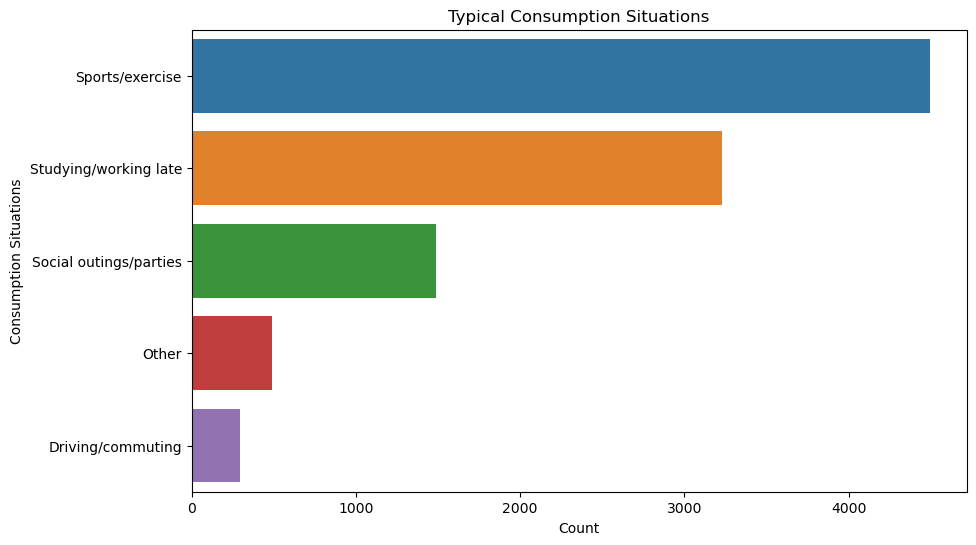

In [54]:
# Plotting the typical consumption situations
plt.figure(figsize=(10, 6))
sns.barplot(y=consumption_situation.index, x=consumption_situation.values, orient='h')
plt.title('Typical Consumption Situations')
plt.xlabel('Count')
plt.ylabel('Consumption Situations')
plt.show()


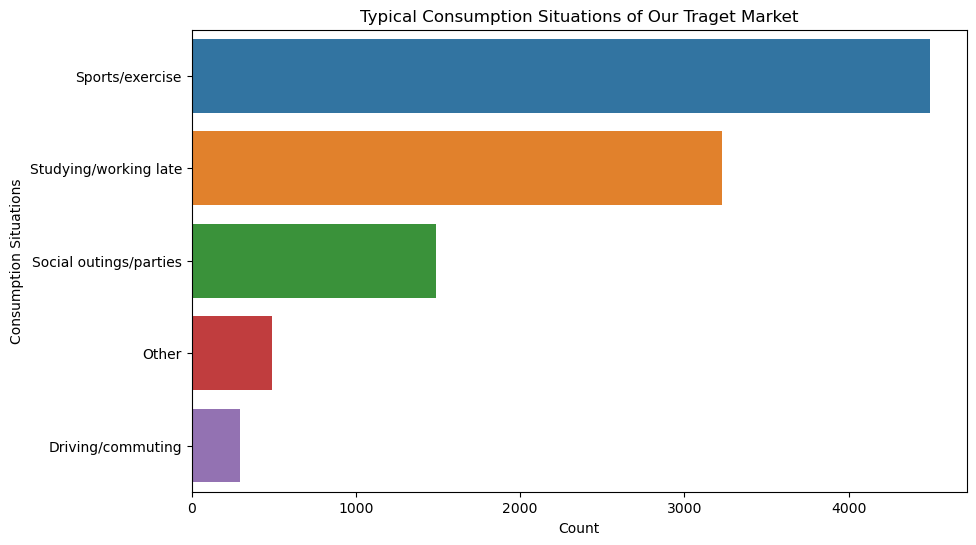

In [55]:
# Extracting the typical consumption situations data
consumption_situation_tm = tm_df['Typical_consumption_situations'].value_counts()

consumption_situation_tm

# Plotting the typical consumption situations
plt.figure(figsize=(10, 6))
sns.barplot(y=consumption_situation_tm.index, x=consumption_situation_tm.values, orient='h')
plt.title('Typical Consumption Situations of Our Traget Market')
plt.xlabel('Count')
plt.ylabel('Consumption Situations')
plt.show()

In [56]:
# Extracting the factors that influence purchase decisions
# 6.c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?
price_range = data['Price_range'].value_counts()
limited_edition_packaging = data['Limited_edition_packaging'].value_counts()

price_range, limited_edition_packaging


(50-99        4288
 100-150      3142
 Above 150    1561
 Below 50     1009
 Name: Price_range, dtype: int64,
 No          4023
 Yes         3946
 Not Sure    2031
 Name: Limited_edition_packaging, dtype: int64)

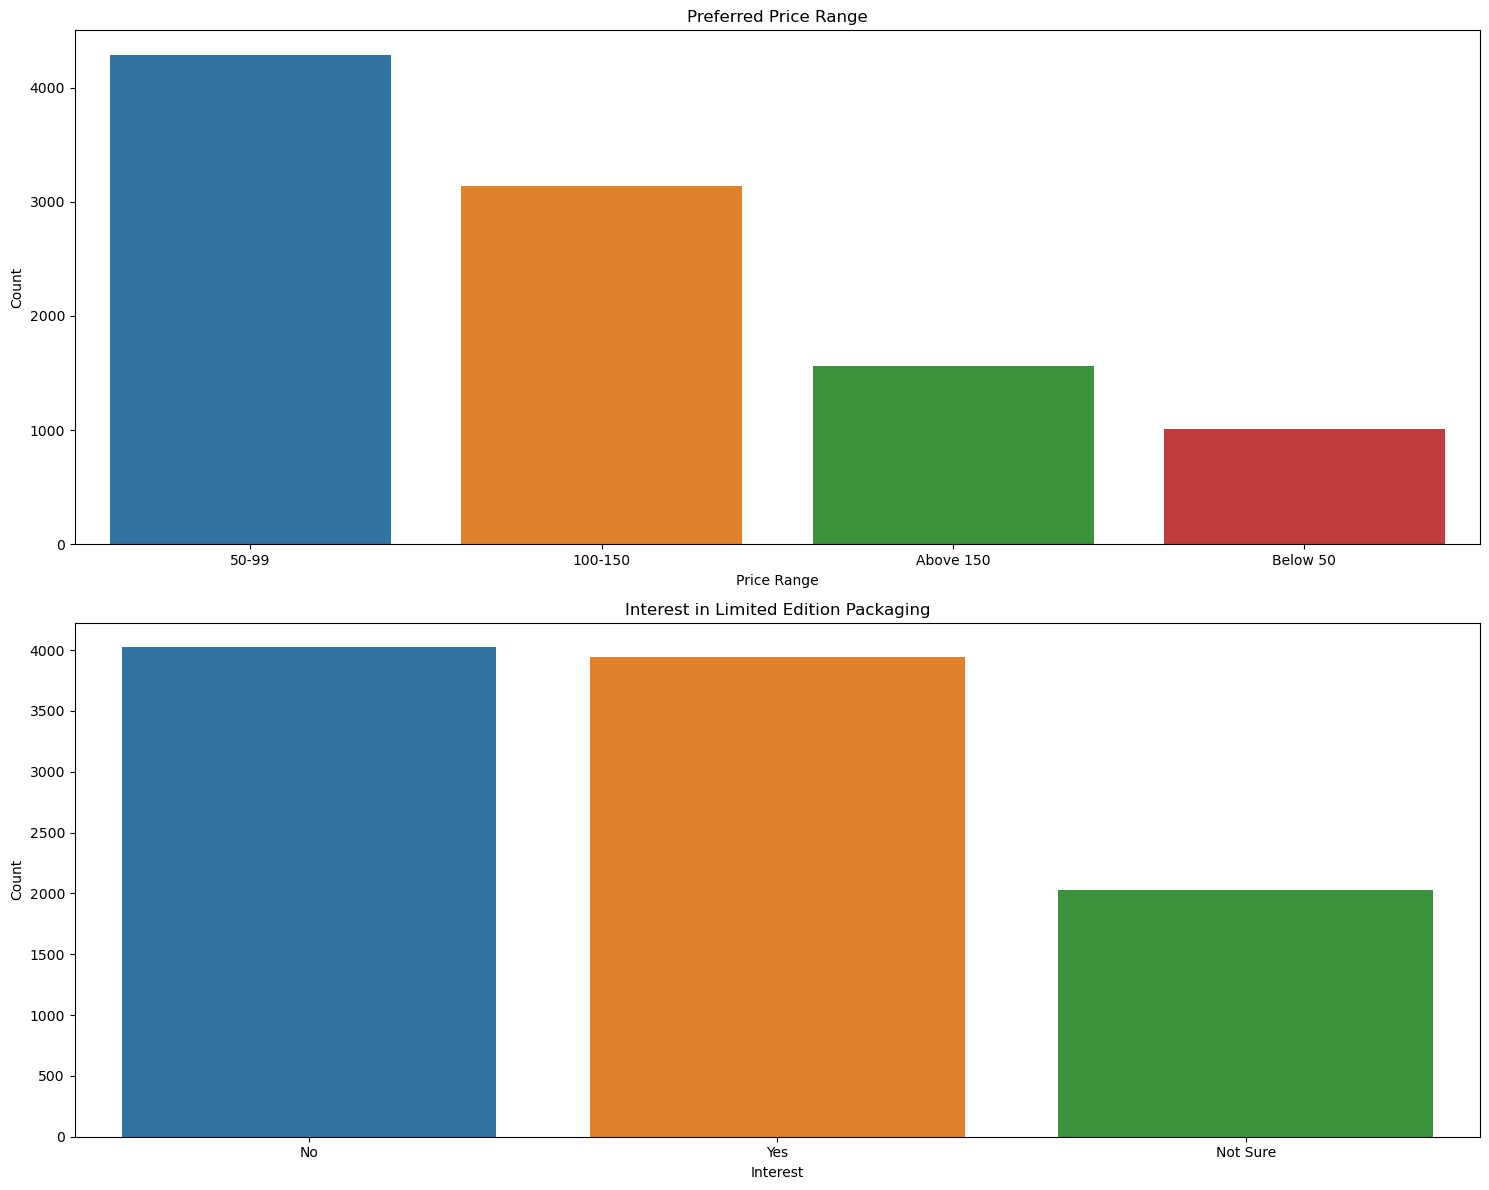

In [57]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# Plot for price range
sns.barplot(x=price_range.index, y=price_range.values, ax=ax[0])
ax[0].set_title('Preferred Price Range')
ax[0].set_xlabel('Price Range')
ax[0].set_ylabel('Count')

# Plot for limited edition packaging
sns.barplot(x=limited_edition_packaging.index, y=limited_edition_packaging.values, ax=ax[1])
ax[1].set_title('Interest in Limited Edition Packaging')
ax[1].set_xlabel('Interest')
ax[1].set_ylabel('Count')

# Adjust the subplots for better layout
plt.tight_layout()

# Show the plots
plt.show()


In [58]:
data.groupby(['Limited_edition_packaging','Price_range']).count()

Response_ID  Respondent_ID  \
Limited_edition_packaging Price_range                               
No                        100-150             1244           1244   
                          50-99               1741           1741   
                          Above 150            639            639   
                          Below 50             399            399   
Not Sure                  100-150              635            635   
                          50-99                868            868   
                          Above 150            322            322   
                          Below 50             206            206   
Yes                       100-150             1263           1263   
                          50-99               1679           1679   
                          Above 150            600            600   
                          Below 50             404            404   

                                       Consume_frequency  Consume_time  \
Limited_edition_packaging Price_range                                    
No                        100-150                   1244          1244   
                          50-99                     1741          1741   
                          Above 150                  639           639   
                          Below 50                   399           399   
Not Sure                  100-150                    635           635   
                          50-99                      868           868   
                          Above 150                  322           322   
                          Below 50                   206           206   
Yes                       100-150                   1263          1263   
                          50-99                     1679          1679   
                          Above 150                  600           600   
                          Below 50                   404           404   

                                       Consume_reason  Heard_before  \
Limited_edition_packaging Price_range                                 
No                        100-150                1244          1244   
                          50-99                  1741          1741   
                          Above 150               639           639   
                          Below 50                399           399   
Not Sure                  100-150                 635           635   
                          50-99                   868           868   
                          Above 150               322           322   
                          Below 50                206           206   
Yes                       100-150                1263          1263   
                          50-99                  1679          1679   
                          Above 150               600           600   
                          Below 50                404           404   

                                       Brand_perception  General_perception  \
Limited_edition_packaging Price_range                                         
No                        100-150                  1244                1244   
                          50-99                    1741                1741   
                          Above 150                 639                 639   
                          Below 50                  399                 399   
Not Sure                  100-150                   635                 635   
                          50-99                     868                 868   
                          Above 150                 322                 322   
                          Below 50                  206                 206   
Yes                       100-150                  1263                1263   
                          50-99                    1679                1679   
                          Above 150                 600                 600   
             

In [59]:
# Creating a new DataFrame 'ProductDev' and dropping inconsistent responses
ProductDev = data[~((data['Heard_before'] == 'No') & (data['Taste_experience'] != 0))]

# Checking for taste more than 1 standard deviation less than the mean
taste = ProductDev[ProductDev['Taste_experience'] < ProductDev['Taste_experience'].mean() - ProductDev['Taste_experience'].std()]

# Checking for 'Not available locally'
availability = ProductDev[ProductDev['Reasons_preventing_trying'] == 'Not available locally']

# Checking for negative branding
branding = ProductDev[(ProductDev['Brand_perception'] == 'Negative') | (ProductDev['Brand_perception'] == 'Neutral')]

# Counting the number of respondents for each focus area
focus_areas_counts = {
    'Taste': len(taste),
    'Availability': len(availability),
    'Branding': len(branding)
}

focus_areas_counts


{'Taste': 1135, 'Availability': 1057, 'Branding': 3368}

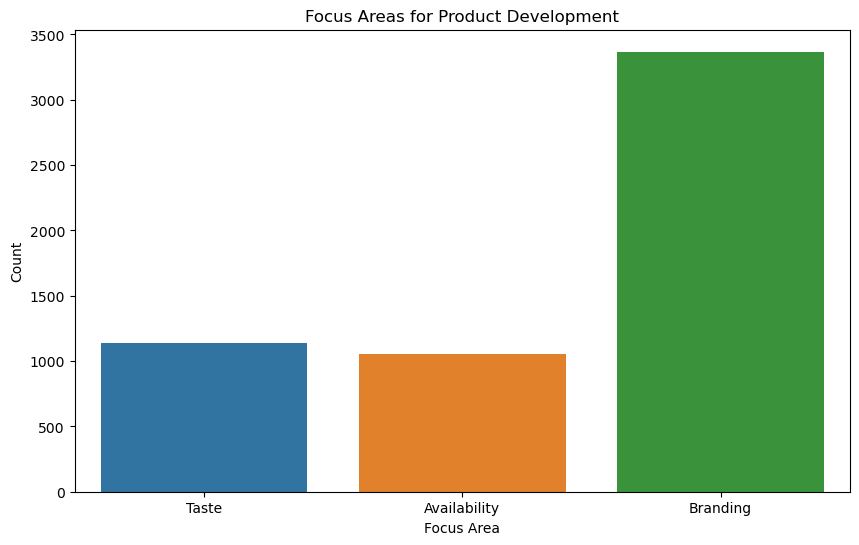

In [60]:
# Create a DataFrame for visualization
focus_areas_df = pd.DataFrame({
    'Focus Area': list(focus_areas_counts.keys()),
    'Count': list(focus_areas_counts.values())
})

# Plotting the focus areas
plt.figure(figsize=(10, 6))
sns.barplot(x='Focus Area', y='Count', data=focus_areas_df)
plt.title('Focus Areas for Product Development')
plt.ylabel('Count')
plt.show()
